## Feasibility study for community health care establishment in rabat-sale community

* The feasibility study of community health care establishment aims to assess the current state of health care accessibility within a defined community area and identify opportunities for improving health care services.
* This study requires the collection and analysis of various datasets,including existing health care facility data, roads data, boundary data, and river data.

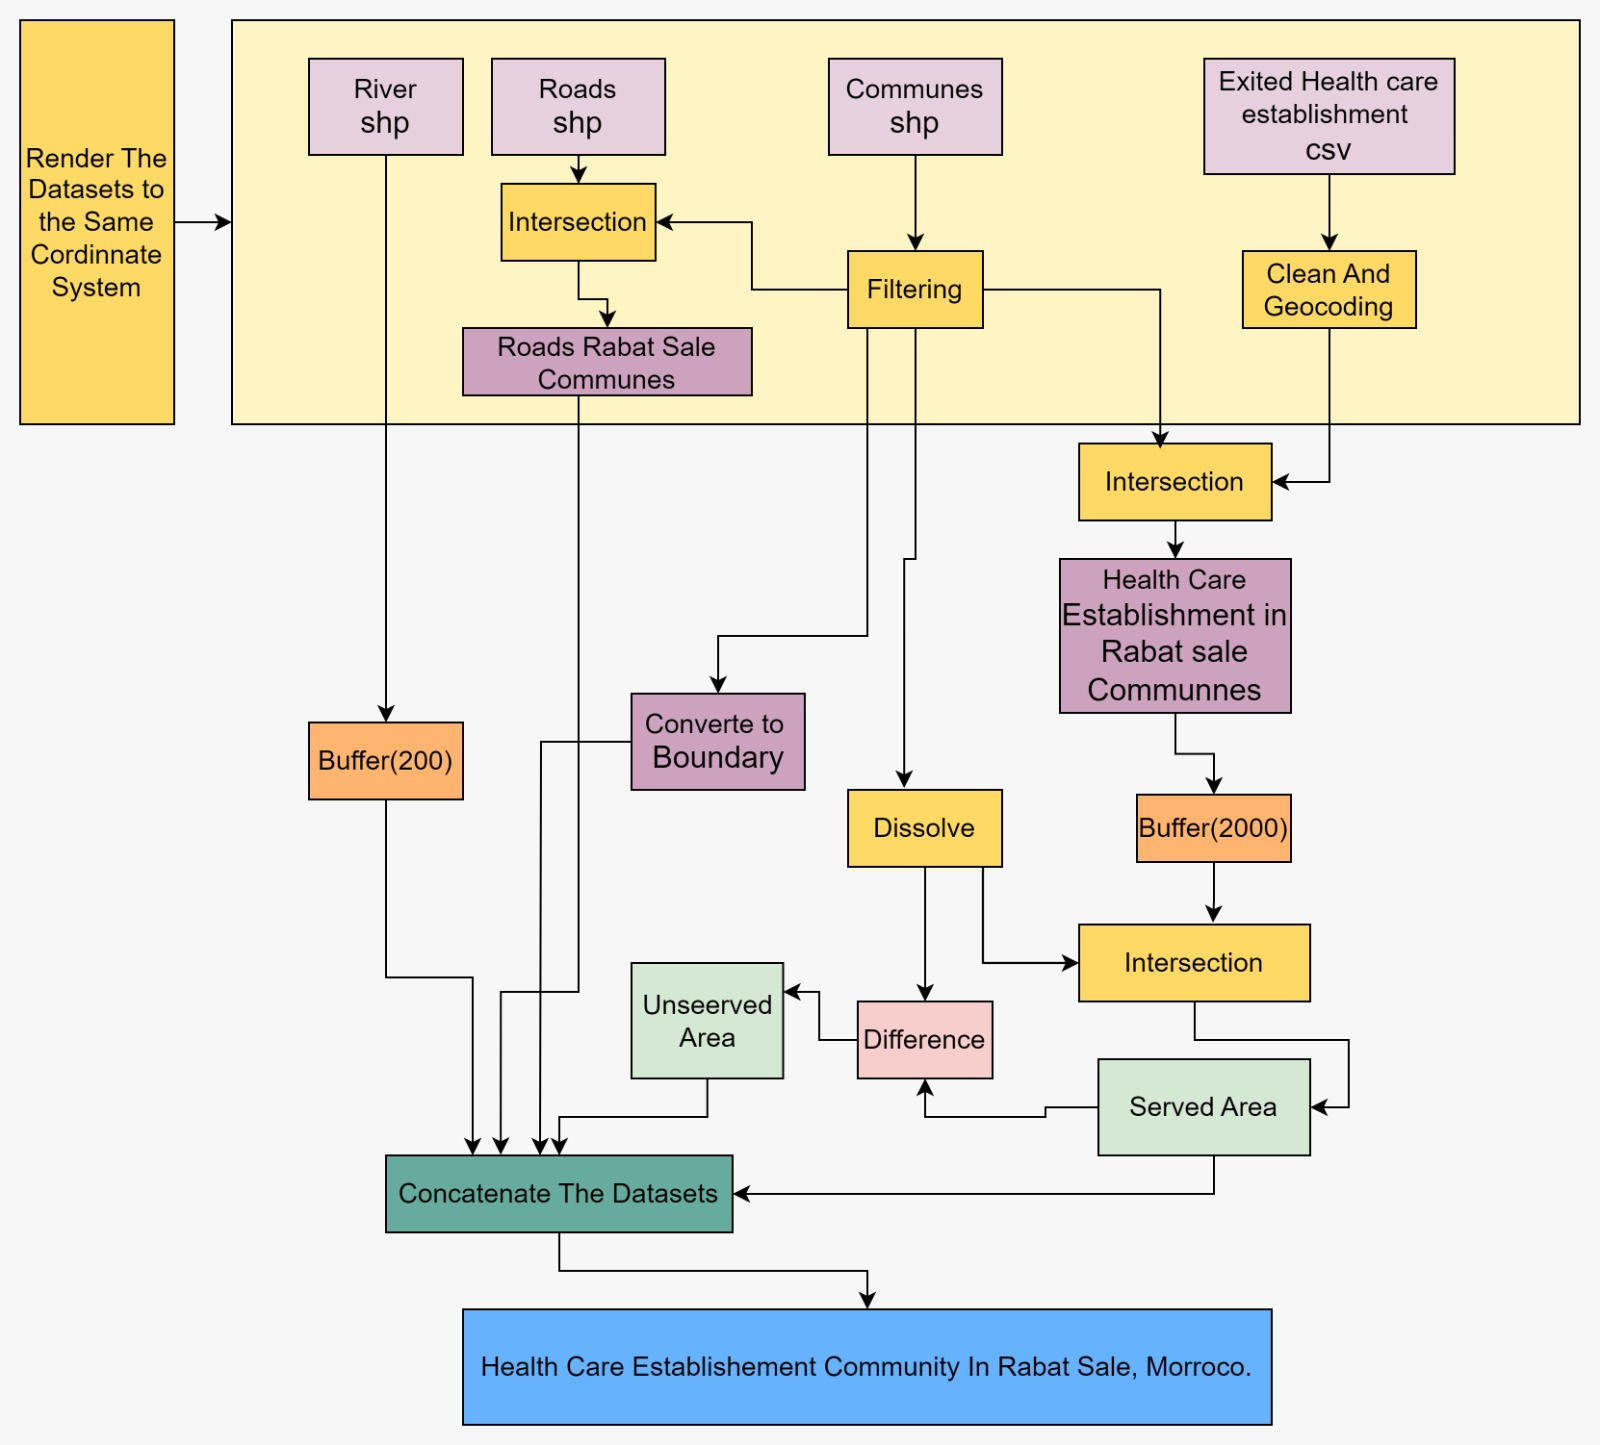

In [550]:
from IPython.display import Image

# Replace 'dataaaa/methodology.png' with the path to your image file
Image(filename='dataaaa/methodology.png', width=1000, height=400)


ERROR: Could not find a version that satisfies the requirement IPython.display (from versions: none)
ERROR: No matching distribution found for IPython.display


## Requirements

**To run the project, the following requirements need to be satisfied:**

* Python: Ensure you have Python installed on your system. This project is compatible with Python 3.x.
* Pandas: Install Pandas for data manipulation and analysis.
* Geopandas: Install Geopandas for working with geospatial data in Python.
* Mapclassify: Install Mapclassify for classification of spatial data.
* Folium: Install Folium for creating interactive maps.
* Matplotlib: Install Matplotlib for data visualization.

In [334]:
import pandas as pd
import geopandas
import mapclassify
import folium
import matplotlib.pyplot as plt

## Data

access the necessary geographical datasets such as existing health care
facilities data, roads data, boundary data, and river data.

* Reads a CSV (Comma Separated Values) file into a pandas DataFrame.

In [394]:
# read health_care data
health_care = pd.read_excel('dataaaa/estab_health.xlsx')

In [395]:
# read the commune data
commune = geopandas.read_file('dataaaa/communes_2015.shp')

In [396]:
# read the roads file or data
roads = geopandas.read_file('dataaaa/roads.shp')

In [397]:
# read the river data
river = geopandas.read_file('dataaaa/bouregreg river.shp')

In [398]:
# read the province data
province = geopandas.read_file('dataaaa/Provinces_2015.shp')

## Preprocessing

* Ensure all datasets are in a compatible format and have a common coordinate reference system (CRS).
* Clean and preprocess the data as necessary (e.g., remove duplicates, handle missing values).

In [340]:
health_care

Nom de l’établissement sanitaire Arrondissement Date de création  \
0        Centre de santé Bab Lakhmiss       Lamrissa             1937   
1           Centre de santé du Jardin       Lamrissa             1961   
2           Centre de santé Bab Sebta       Lamrissa            19/66   
3         Centre de santé Sidi Moussa       Lamrissa             1982   
4        Centre de santé Hay El Kifah       H’ssaine             2008   
5          Centre de santé Said Hajji       Lamrissa             2006   
6              Centre de santé Souani       Lamrissa             2008   
7             Centre de santé Bettana        Bettana             1969   
8        Centre de santé Hay Salam II        Bettana             1979   
9         Centre de santé Hay Salam I        Bettana             1980   
10          Centre de santé pépinière      Tabriquet             1959   
11          Centre de santé Tabriquet      Tabriquet            19/60   
12          Centre de santé Hay Rahma      Tabriquet             1991   
13         Centre de santé Laayayda I       Laayayda             1998   
14           Centre de santé Al Karia       H’ssaine             1982   
15   Centre de santé Sala Al Jadida I       H’ssaine             1998   
16  Centre de santé Sala Al Jadida II       H’ssaine             2001   
17          Centre de santé My Ismail        Bettana             2003   
18    Centre de santé Cheikh Lamfadel      Tabriquet             1972   

                                              Adresse  
0                  Avenue 2 Mars, Bab Lakhmiss, Salé.  
1                       Rue du Jardin, Lamrissa, Salé  
2                    Av. My Slimane, Bab Sebta, Salé.  
3                     Souk Joutia, Sidi Moussa, Salé.  
4                                                 NaN  
5              Lot. Said Hajji, Rte de Kénitra, Salé.  
6             Rue 2, Lot. R’batia, Sidi Moussa, Salé.  
7                        Av. Mediouna, Bettana, Salé.  
8   Av. Abdelkrim EL KHATTABI, Hay Salam, Bettana,...  
9               Av. Sahara, Hay Salam, Bettana, Salé.  
10                    Av. pépinière, Tabriquet, Salé.  
11                       Av. Soudan, Tabriquet, Salé.  
12               Sect. D, Hay Rahma, Tabriquet, Salé.  
13                Av. Ibn El Haytham, Laayayda, Salé.  
14         Av. Sidi Med Ben Abdellah, H’ssaine, Salé.  
15             Place du Masjid, Sala Al Jadida, Salé.  
16              Av. Med Hassar, Sala Al Jadida, Salé.  
17                                                NaN  
18                                                NaN

In [399]:
health_care.shape

(19, 4)

In [400]:
health_care.size

76

In [401]:
health_care.dtypes

Nom de l’établissement sanitaire    object
Arrondissement                      object
Date de création                    object
Adresse                             object
dtype: object

In [402]:
health_care.index

RangeIndex(start=0, stop=19, step=1)

In [403]:
health_care.axes

[RangeIndex(start=0, stop=19, step=1),
 Index(['Nom de l’établissement sanitaire', 'Arrondissement',
        'Date de création', 'Adresse'],
       dtype='object')]

**.columns**

*   Description: Returns the column labels of the DataFrame.
*   Return Value: Index containing column labels.

In [404]:
# discover also the columns of the data
health_care.columns

Index(['Nom de l’établissement sanitaire', 'Arrondissement',
       'Date de création', 'Adresse'],
      dtype='object')

**.rename**

*   Description: Rename columns of the DataFrame.
*   columns: Dictionary or mapping function to rename the columns.

In [405]:
# Rename columns for clarity
health_care = health_care.rename(columns={
    'Nom de l’établissement sanitaire': 'establishment health care name',
    'Arrondissement': 'district',
    'Date de création': 'Creation Date',
    'Adresse': 'Adress'
})

**.head(n)**

*   Description: Returns the first n rows of the DataFrame.
*   n: Number of rows to return.

In [406]:
health_care.head(2)

establishment health care name  district Creation Date  \
0   Centre de santé Bab Lakhmiss  Lamrissa          1937   
1      Centre de santé du Jardin  Lamrissa          1961   

                               Adress  
0  Avenue 2 Mars, Bab Lakhmiss, Salé.  
1       Rue du Jardin, Lamrissa, Salé

In [407]:
health_care['Creation Date']

0      1937
1      1961
2     19/66
3      1982
4      2008
5      2006
6      2008
7      1969
8      1979
9      1980
10     1959
11    19/60
12     1991
13     1998
14     1982
15     1998
16     2001
17     2003
18     1972
Name: Creation Date, dtype: object

In [350]:
# Increase the maximum number of rows displayed
pd.set_option('display.max_rows', None)

In [351]:
health_care['Creation Date']

0      1937
1      1961
2     19/66
3      1982
4      2008
5      2006
6      2008
7      1969
8      1979
9      1980
10     1959
11    19/60
12     1991
13     1998
14     1982
15     1998
16     2001
17     2003
18     1972
Name: Creation Date, dtype: object

**.astype(str).str.replace**

*   Description: Convert column to string type and replace values using regular expression.

In [409]:
# Convert the 'Creation Date' column to string and remove slashes
health_care['Creation Date'] = health_care['Creation Date'].astype(str).str.replace("/", "")

In [410]:
# Verifying that the slashes have been removed from the 'Creation Date' column
health_care['Creation Date']

0     1937
1     1961
2     1966
3     1982
4     2008
5     2006
6     2008
7     1969
8     1979
9     1980
10    1959
11    1960
12    1991
13    1998
14    1982
15    1998
16    2001
17    2003
18    1972
Name: Creation Date, dtype: object

In [411]:
health_care.isna().sum().sum()

3

In [412]:
health_care.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19 entries, 0 to 18
Data columns (total 4 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   establishment health care name  19 non-null     object
 1   district                        19 non-null     object
 2   Creation Date                   19 non-null     object
 3   Adress                          16 non-null     object
dtypes: object(4)
memory usage: 740.0+ bytes


**.dropna(axis=0, inplace=True, ignore_index=True)**


*   Description: Drop rows with missing values.
*   Parameters

          1.   axis: Axis along which to drop NaN values (0 for rows, 1 for columns).
          2.   Linplace: Whether to drop rows/columns in-place or return a new DataFrame.
          3.   ignore_index: Reset index after dropping rows.

In [413]:
# Drop rows with NaN values
health_care.dropna(axis=0, inplace=True, ignore_index=True)

**.info()**

*   Description: Print a concise summary of the DataFrame.

In [414]:
# Display information about the DataFrame including column names, data types, and non-null counts
health_care.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 4 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   establishment health care name  16 non-null     object
 1   district                        16 non-null     object
 2   Creation Date                   16 non-null     object
 3   Adress                          16 non-null     object
dtypes: object(4)
memory usage: 644.0+ bytes


**geopandas.tools.geocode**

*   Description: Geocode addresses to coordinates

In [415]:
# Geocode the addresses in the 'Adress' column of the health_care DataFrame to obtain their locations
health_care_loc = geopandas.tools.geocode(health_care.Adress)

In [416]:
health_care_loc

geometry  \
0   POINT (-6.81794 34.03643)   
1   POINT (-1.85317 46.63911)   
2   POINT (-6.81984 34.04290)   
3   POINT (-6.85947 34.00943)   
4   POINT (-6.81937 34.03439)   
5   POINT (-0.62651 35.22032)   
6   POINT (-6.80574 34.03461)   
7   POINT (-6.78545 34.04052)   
8   POINT (-6.80192 34.03538)   
9   POINT (-6.80752 34.04501)   
10  POINT (-6.80752 34.04501)   
11  POINT (-6.80511 34.05229)   
12  POINT (-6.76093 34.06840)   
13  POINT (-9.23633 32.29171)   
14  POINT (43.98677 33.73079)   
15  POINT (-6.74094 33.99298)   

                                              address  
0   Bab Lakhmiss, Avenue Sidi Mohammed, 11005, Ave...  
1   Rue des Jardins du Motais, 85470, Bretignolles...  
2   Pharmacie Bab Sebta, Avenue Salah Eddine el Ay...  
3   Rue Sidi Ahmed Ben Moussa زنقة سيدي أحمد بن مو...  
4   Avenue Ach Said Ahmed Hajji, 11005, Salé ⵙⵍⴰ س...  
5   CEM Chikhi Moussa, rue Zaidi abdelkader, 22002...  
6   Avenue Mediouna, 11002, Bettana بطانة, Rabat-S...  
7   Avenue Abdelkrim El Khattabi, 11030, Bettana ب...  
8   Gare routière de Salé, Avenue Hassan II شارع ا...  
9   Salé Tabriquet, Avenue Mohamed V, 11015, Avenu...  
10  Salé Tabriquet, Avenue Mohamed V, 11015, Avenu...  
11  Gare de Salé Tabriquet محطة سلا تابريكت, Rue N...  
12  Avenue Ibn Al Haytem, 11016, Layayda لعيايدة, ...  
13  Avenue Sidi Mohamed Ben Abdellah, 46013, Safi ...  
14               عبد الحميد الجدة, صلاح الدين, العراق  
15  Istea Sala Al Jadida, Avenue Atlas شارع الأطلس...

**.type()**

*   Description: Returns the type of an object.

In [360]:
# Checking the type of the health_care DataFrame
type(health_care)  # This line checks the type of the health_care DataFrame

pandas.core.frame.DataFrame

**geopandas.GeoDataFrame**

*   Description: Create a GeoDataFrame from a DataFrame.

In [361]:
# Creating a GeoDataFrame from the health_care DataFrame and the geometry column from health_care_loc
health_care_gdf = geopandas.GeoDataFrame(health_care, geometry=health_care_loc['geometry'])  # This line creates a GeoDataFrame

<Axes: >

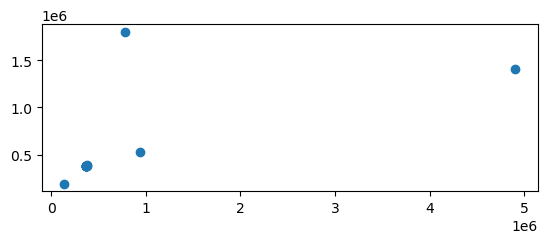

In [417]:
health_care_gdf.plot()

<Axes: >

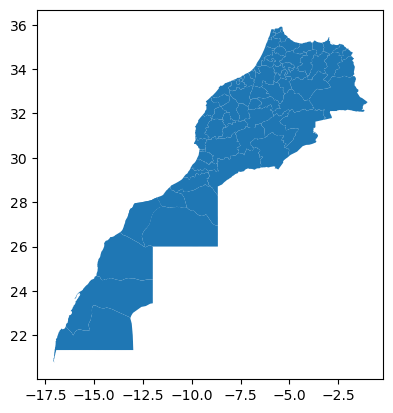

In [363]:
province.plot()

In [425]:
# discover the name of provinces
province.NAME

0                 Assa Zag
1                  Guelmim
2                  Tan Tan
3                     Tata
4      Agadir Ida Ou Tanan
5         Chtouka Ait Baha
6     Inezgane Ait Melloul
7               Ouarzazate
8               Taroudannt
9                   Tiznit
10                  Zagora
11              Benslimane
12               Khouribga
13                  Settat
14                Al Haouz
15               Chichaoua
16    El Kelaa des Sraghna
17               Essaouira
18               Marrakech
19              Casablanca
20                Mediouna
21              Mohammedia
22                Nouaceur
23               Khemisset
24                   Rabat
25                    Sale
26         Skhirate Temara
27               El Jadida
28                    Safi
29                  Azilal
30              benimellal
31                Aousserd
32            Oued Eddahab
33                Boujdour
34                laayoune
35                 kenitra
36              Sidi Kacem
3

**pd.set_option('display.max_rows', None)**

*   Description: Set the maximum number of rows displayed in the output.

In [419]:
# Increase the maximum number of rows displayed
pd.set_option('display.max_rows', None)

In [420]:
province.NAME

0                 Assa Zag
1                  Guelmim
2                  Tan Tan
3                     Tata
4      Agadir Ida Ou Tanan
5         Chtouka Ait Baha
6     Inezgane Ait Melloul
7               Ouarzazate
8               Taroudannt
9                   Tiznit
10                  Zagora
11              Benslimane
12               Khouribga
13                  Settat
14                Al Haouz
15               Chichaoua
16    El Kelaa des Sraghna
17               Essaouira
18               Marrakech
19              Casablanca
20                Mediouna
21              Mohammedia
22                Nouaceur
23               Khemisset
24                   Rabat
25                    Sale
26         Skhirate Temara
27               El Jadida
28                    Safi
29                  Azilal
30              benimellal
31                Aousserd
32            Oued Eddahab
33                Boujdour
34                laayoune
35                 kenitra
36              Sidi Kacem
3

**.loc**

*   Description: Access a group of rows and columns by label(s).
*   startswith: Generates a boolean Series indicating whether each entry in the 'NAME' column starts with 'Rabat'.

In [422]:
# Create a new DataFrame containing rows where the province name is either 'Rabat' or 'Sale'
rabat_sale = province.loc[(province.NAME == 'Rabat') | (province.NAME == 'Sale')]

In [423]:
rabat_sale

OBJECTID_1   NAME  pop_maroca  pop_etrang  pop_total_  menages_14  \
24          25  Rabat    564936.0     12891.0    577827.0    577827.0   
25          26   Sale    979816.0      2347.0    982163.0    982163.0   

    class_pop         SRF   DENSITE_14  RuleID  ...  menage_urb   pop_urb  \
24          1  115.497372  5002.944989       5  ...    151670.0  577827.0   
25          1  716.653286  1370.485589       5  ...    218432.0  915658.0   

    etrange_ur  marocain_u  menage_rur  pop_rur  etranger_r  marocain_r  \
24     12891.0    564936.0         0.0      0.0         0.0         0.0   
25      2325.0    913333.0     12908.0  66505.0        22.0     66483.0   

     prcnt_urb                                           geometry  
24  100.000000  POLYGON ((-6.82591 33.89478, -6.82636 33.89518...  
25   93.228721  POLYGON ((-6.54667 33.78462, -6.54754 33.78439...  

[2 rows x 22 columns]

**.crs**

*   Description: Returns the Coordinate Reference System (CRS) of the GeoDataFrame.

In [424]:
# Retrieve the coordinate reference system (CRS) of the health_care_gdf GeoDataFrame
health_care_gdf.crs  # This line returns the CRS information of the GeoDataFrame

<Projected CRS: EPSG:26191>
Name: Merchich / Nord Maroc
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: Morocco onshore north of 35 grads North (31°30'N).
- bounds: (-9.85, 31.49, -1.01, 35.97)
Coordinate Operation:
- name: Nord Maroc
- method: Lambert Conic Conformal (1SP)
Datum: Merchich
- Ellipsoid: Clarke 1880 (IGN)
- Prime Meridian: Greenwich

In [426]:
rabat_sale.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

**.to_crs**

*   Description: Convert the GeoDataFrame to a new CRS.

In [430]:
# Reproject the 'rabat_sale' GeoDataFrame to EPSG 26191 coordinate reference system
rabat_sale = rabat_sale.to_crs(epsg=26191)

In [431]:
rabat_sale.crs

<Projected CRS: EPSG:26191>
Name: Merchich / Nord Maroc
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: Morocco onshore north of 35 grads North (31°30'N).
- bounds: (-9.85, 31.49, -1.01, 35.97)
Coordinate Operation:
- name: Nord Maroc
- method: Lambert Conic Conformal (1SP)
Datum: Merchich
- Ellipsoid: Clarke 1880 (IGN)
- Prime Meridian: Greenwich

In [432]:
# Reproject the 'health_care' GeoDataFrame to match the CRS of 'rabat_sale'
health_care_gdf = health_care_gdf.to_crs(rabat_sale.crs)

In [433]:
health_care_gdf.crs

<Projected CRS: EPSG:26191>
Name: Merchich / Nord Maroc
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: Morocco onshore north of 35 grads North (31°30'N).
- bounds: (-9.85, 31.49, -1.01, 35.97)
Coordinate Operation:
- name: Nord Maroc
- method: Lambert Conic Conformal (1SP)
Datum: Merchich
- Ellipsoid: Clarke 1880 (IGN)
- Prime Meridian: Greenwich

In [434]:
commune.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [436]:
# Reproject the 'commune' GeoDataFrame to match the CRS of 'rabat_sale'
commune = commune.to_crs(rabat_sale.crs)

**.plot(base='')**

*   Description: Plot the GeoDataFrame on a base map.
*   Parameters:
     *   base: Base map (e.g., world, countries, etc.).

In [437]:
commune.crs

<Projected CRS: EPSG:26191>
Name: Merchich / Nord Maroc
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: Morocco onshore north of 35 grads North (31°30'N).
- bounds: (-9.85, 31.49, -1.01, 35.97)
Coordinate Operation:
- name: Nord Maroc
- method: Lambert Conic Conformal (1SP)
Datum: Merchich
- Ellipsoid: Clarke 1880 (IGN)
- Prime Meridian: Greenwich

In [438]:
roads.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [439]:
roads = roads.to_crs(epsg=26191)

In [440]:
roads.crs

<Projected CRS: EPSG:26191>
Name: Merchich / Nord Maroc
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: Morocco onshore north of 35 grads North (31°30'N).
- bounds: (-9.85, 31.49, -1.01, 35.97)
Coordinate Operation:
- name: Nord Maroc
- method: Lambert Conic Conformal (1SP)
Datum: Merchich
- Ellipsoid: Clarke 1880 (IGN)
- Prime Meridian: Greenwich

In [441]:
river.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [442]:
river = river.to_crs(epsg=26191)

In [443]:
river.crs

<Projected CRS: EPSG:26191>
Name: Merchich / Nord Maroc
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: Morocco onshore north of 35 grads North (31°30'N).
- bounds: (-9.85, 31.49, -1.01, 35.97)
Coordinate Operation:
- name: Nord Maroc
- method: Lambert Conic Conformal (1SP)
Datum: Merchich
- Ellipsoid: Clarke 1880 (IGN)
- Prime Meridian: Greenwich

# 	Calculating Service Areas:

*   Buffer each health care facility's location by 2km to represent the service area.
*   Overlay the buffered areas with the study area boundary to limit analysis to the defined region.
*   Identify served and underserved areas based on accessibility standards.

**.overlay()**


*   Description: Computes the spatial intersection between two GeoDataFrame
* Parameters:
*  gdf object: GeoDataFrame representing the boundary of Rabat-Salé.
*  how='intersection': Specifies the type of overlay operation to perform.
*  Return Value: GeoDataFrame containing the geometries resulting from the intersection operation.

<Axes: >

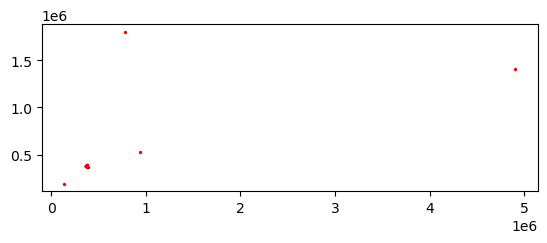

In [444]:
# Plot the 'rabat_sale' GeoDataFrame with white color for the polygons and black for the edges
# Then, overlay the 'health_care' GeoDataFrame on the same plot, showing health care locations in red with marker size 2

base = rabat_sale.plot(color='white', edgecolor='black')
health_care_gdf.plot(ax=base, color='red', markersize=2)

<Axes: >

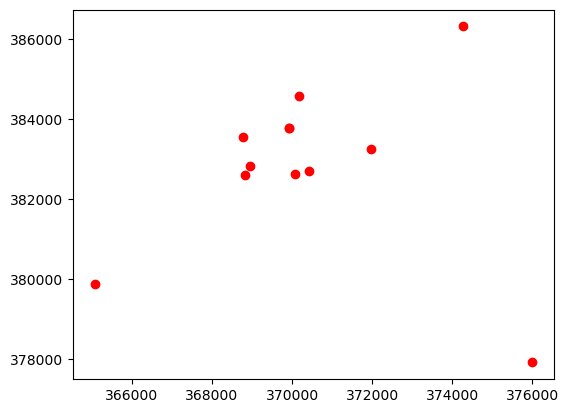

In [445]:
# Overlay the 'health_care' GeoDataFrame on top of the 'rabat_sale' GeoDataFrame to find the intersection,
# then plot the resulting intersection area with health care locations shown in red

hlth_care_intersection = health_care_gdf.overlay(rabat_sale, how='intersection')
hlth_care_intersection.plot(color='red')

<Axes: >

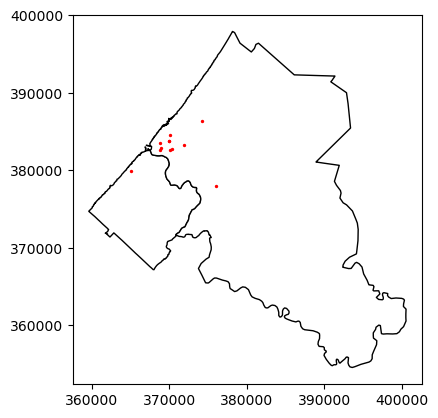

In [446]:
# Plot the 'rabat_sale' GeoDataFrame as the base map with white polygons and black edges,
# then overlay the intersection of health care locations with the 'rabat_sale' area,
# showing the intersection area in red and health care locations as red points

base = rabat_sale.plot(color='white', edgecolor='black')
hlth_care_intersection.plot(ax=base, color='red', markersize=2)

C:\Users\mahhi\anaconda3\Lib\site-packages\geopandas\geodataframe.py:2467: UserWarning: `keep_geom_type=True` in overlay resulted in 243 dropped geometries of different geometry types than df1 has. Set `keep_geom_type=False` to retain all geometries
  return geopandas.overlay(


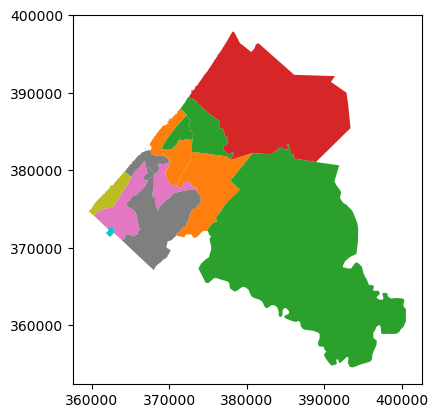

In [447]:
# Overlay the 'commune' polygons with the 'rabat_sale' polygons to get the intersection area,
# then plot the resulting intersection area using a colormap ('tab10') to distinguish different communes polygons

comm_intersection = commune.overlay(rabat_sale, how='intersection')
ax = comm_intersection.plot(cmap='tab10')

*   Parameters:comm_intersection: GeoDataFrame representing the intersection of communities.
*   hlth_care_intersection: GeoDataFrame representing the intersection of health care facilities.
*   op='intersects': Specifies the spatial relationship to use for the join operation.
*   how='inner': Specifies the type of join to perform.
*   Return Value: GeoDataFrame containing the result of the spatial join operation.


C:\Users\mahhi\anaconda3\Lib\site-packages\IPython\core\interactiveshell.py:3493: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):


<Axes: >

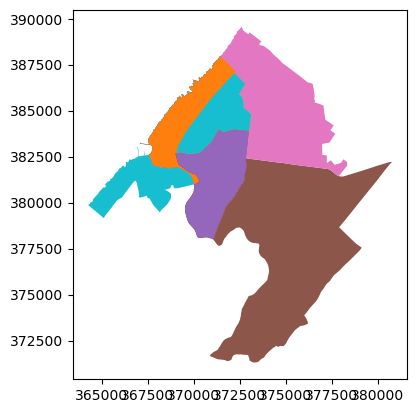

In [448]:
# Perform a spatial join between the intersection of communes and the intersection of health care facilities
# with the Rabat-Sale area ('comm_intersection' and 'hlth_care_intersection', respectively),
# keeping only the features that intersect in both datasets ('inner' join).
# Then, plot the result using a categorical colormap ('tab10').


comm_intersect_hlth = geopandas.sjoin(comm_intersection, hlth_care_intersection, op='intersects', how='inner')
comm_intersect_hlth.plot(cmap='tab10')

In [274]:
comm_intersect_hlth.columns

Index(['OBJECTID', 'ID', 'NAME_1', 'POP', 'Shape_Leng_1', 'Shape_Area_1',
       'OBJECTID_1_left', 'NAME_2', 'pop_maroca_left', 'pop_etrang_left',
       'pop_total__left', 'menages_14_left', 'class_pop_left', 'SRF_left',
       'DENSITE_14_left', 'RuleID_left', 'Shape_Leng_2', 'Shape_Area_2',
       'menage_urb_left', 'pop_urb_left', 'etrange_ur_left', 'marocain_u_left',
       'menage_rur_left', 'pop_rur_left', 'etranger_r_left', 'marocain_r_left',
       'prcnt_urb_left', 'geometry', 'index_right',
       'establishment health care name', 'district', 'Creation Date', 'Adress',
       'OBJECTID_1_right', 'NAME', 'pop_maroca_right', 'pop_etrang_right',
       'pop_total__right', 'menages_14_right', 'class_pop_right', 'SRF_right',
       'DENSITE_14_right', 'RuleID_right', 'Shape_Leng', 'Shape_Area',
       'menage_urb_right', 'pop_urb_right', 'etrange_ur_right',
       'marocain_u_right', 'menage_rur_right', 'pop_rur_right',
       'etranger_r_right', 'marocain_r_right', 'prcnt_urb_r

In [449]:
comm_intersect_hlth.POP

4     140383.0
4     140383.0
4     140383.0
5     103165.0
5     103165.0
5     103165.0
6     163672.0
7     118233.0
8     234733.0
8     234733.0
8     234733.0
22    128425.0
Name: POP, dtype: float64

In [451]:
# Dissolve based on a column named 'Type'
comm_intersect_hlth2 =comm_intersect_hlth.dissolve(by='POP', aggfunc='first')

In [452]:
comm_intersect_hlth2

geometry  OBJECTID  \
POP                                                                     
103165.0  POLYGON ((370889.939 378064.137, 370875.629 37...       634   
118233.0  POLYGON ((377870.942 381442.200, 377865.054 38...       636   
128425.0  POLYGON ((365092.877 379160.872, 365088.935 37...       616   
140383.0  POLYGON ((369895.703 381294.002, 369859.773 38...       633   
163672.0  POLYGON ((374491.185 372205.675, 374486.027 37...       635   
234733.0  POLYGON ((369793.331 382667.376, 369748.001 38...       637   

                    ID        NAME_1  Shape_Leng_1  Shape_Area_1  \
POP                                                                
103165.0  1.504000e+13       Bettana      0.172995      0.001334   
118233.0  1.504000e+13       Layayda      0.273978      0.002541   
128425.0  1.504000e+13        Hassan      0.199253      0.000828   
140383.0  1.504000e+13  Bab Lamrissa      0.236634      0.000939   
163672.0  1.504000e+13       Hssaine      0.425328      0.005136   
234733.0  1.504000e+13     Tabriquet      0.137808      0.000766   

          OBJECTID_1_left NAME_2  pop_maroca_left  pop_etrang_left  ...  \
POP                                                                 ...   
103165.0               26   Sale         979816.0           2347.0  ...   
118233.0               26   Sale         979816.0           2347.0  ...   
128425.0               25  Rabat         564936.0          12891.0  ...   
140383.0               26   Sale         979816.0           2347.0  ...   
163672.0               26   Sale         979816.0           2347.0  ...   
234733.0               26   Sale         979816.0           2347.0  ...   

          Shape_Area  menage_urb_right  pop_urb_right  etrange_ur_right  \
POP                                                                       
103165.0    0.069895          218432.0       915658.0            2325.0   
118233.0    0.069895          218432.0       915658.0            2325.0   
128425.0    0.011264          151670.0       577827.0           12891.0   
140383.0    0.069895          218432.0       915658.0            2325.0   
163672.0    0.069895          218432.0       915658.0            2325.0   
234733.0    0.069895          218432.0       915658.0            2325.0   

          marocain_u_right  menage_rur_right  pop_rur_right  etranger_r_right  \
POP                                                                             
103165.0          913333.0           12908.0        66505.0              22.0   
118233.0          913333.0           12908.0        66505.0              22.0   
128425.0          564936.0               0.0            0.0               0.0   
140383.0          913333.0           12908.0        66505.0              22.0   
163672.0          913333.0           12908.0        66505.0              22.0   
234733.0          913333.0           12908.0        66505.0              22.0   

          marocain_r_right  prcnt_urb_right  
POP                                          
103165.0           66483.0        93.228721  
118233.0           66483.0        93.228721  
128425.0               0.0       100.000000  
140383.0           66483.0        93.228721  
163672.0           66483.0        93.228721  
234733.0           66483.0        93.228721  

[6 rows x 53 columns]

In [454]:
comm_intersect_hlth2.reset_index(inplace=True)

In [455]:
comm_intersect_hlth2

index       POP                                           geometry  \
0      0  103165.0  POLYGON ((370889.939 378064.137, 370875.629 37...   
1      1  118233.0  POLYGON ((377870.942 381442.200, 377865.054 38...   
2      2  128425.0  POLYGON ((365092.877 379160.872, 365088.935 37...   
3      3  140383.0  POLYGON ((369895.703 381294.002, 369859.773 38...   
4      4  163672.0  POLYGON ((374491.185 372205.675, 374486.027 37...   
5      5  234733.0  POLYGON ((369793.331 382667.376, 369748.001 38...   

   OBJECTID            ID        NAME_1  Shape_Leng_1  Shape_Area_1  \
0       634  1.504000e+13       Bettana      0.172995      0.001334   
1       636  1.504000e+13       Layayda      0.273978      0.002541   
2       616  1.504000e+13        Hassan      0.199253      0.000828   
3       633  1.504000e+13  Bab Lamrissa      0.236634      0.000939   
4       635  1.504000e+13       Hssaine      0.425328      0.005136   
5       637  1.504000e+13     Tabriquet      0.137808      0.000766   

   OBJECTID_1_left NAME_2  ...  Shape_Area  menage_urb_right  pop_urb_right  \
0               26   Sale  ...    0.069895          218432.0       915658.0   
1               26   Sale  ...    0.069895          218432.0       915658.0   
2               25  Rabat  ...    0.011264          151670.0       577827.0   
3               26   Sale  ...    0.069895          218432.0       915658.0   
4               26   Sale  ...    0.069895          218432.0       915658.0   
5               26   Sale  ...    0.069895          218432.0       915658.0   

   etrange_ur_right  marocain_u_right  menage_rur_right  pop_rur_right  \
0            2325.0          913333.0           12908.0        66505.0   
1            2325.0          913333.0           12908.0        66505.0   
2           12891.0          564936.0               0.0            0.0   
3            2325.0          913333.0           12908.0        66505.0   
4            2325.0          913333.0           12908.0        66505.0   
5            2325.0          913333.0           12908.0        66505.0   

   etranger_r_right  marocain_r_right  prcnt_urb_right  
0              22.0           66483.0        93.228721  
1              22.0           66483.0        93.228721  
2               0.0               0.0       100.000000  
3              22.0           66483.0        93.228721  
4              22.0           66483.0        93.228721  
5              22.0           66483.0        93.228721  

[6 rows x 55 columns]

In [457]:
comm_intersect_hlth2

index       POP                                           geometry  \
0      0  103165.0  POLYGON ((370889.939 378064.137, 370875.629 37...   
1      1  118233.0  POLYGON ((377870.942 381442.200, 377865.054 38...   
2      2  128425.0  POLYGON ((365092.877 379160.872, 365088.935 37...   
3      3  140383.0  POLYGON ((369895.703 381294.002, 369859.773 38...   
4      4  163672.0  POLYGON ((374491.185 372205.675, 374486.027 37...   
5      5  234733.0  POLYGON ((369793.331 382667.376, 369748.001 38...   

   OBJECTID            ID        NAME_1  Shape_Leng_1  Shape_Area_1  \
0       634  1.504000e+13       Bettana      0.172995      0.001334   
1       636  1.504000e+13       Layayda      0.273978      0.002541   
2       616  1.504000e+13        Hassan      0.199253      0.000828   
3       633  1.504000e+13  Bab Lamrissa      0.236634      0.000939   
4       635  1.504000e+13       Hssaine      0.425328      0.005136   
5       637  1.504000e+13     Tabriquet      0.137808      0.000766   

   OBJECTID_1_left NAME_2  ...  Shape_Area  menage_urb_right  pop_urb_right  \
0               26   Sale  ...    0.069895          218432.0       915658.0   
1               26   Sale  ...    0.069895          218432.0       915658.0   
2               25  Rabat  ...    0.011264          151670.0       577827.0   
3               26   Sale  ...    0.069895          218432.0       915658.0   
4               26   Sale  ...    0.069895          218432.0       915658.0   
5               26   Sale  ...    0.069895          218432.0       915658.0   

   etrange_ur_right  marocain_u_right  menage_rur_right  pop_rur_right  \
0            2325.0          913333.0           12908.0        66505.0   
1            2325.0          913333.0           12908.0        66505.0   
2           12891.0          564936.0               0.0            0.0   
3            2325.0          913333.0           12908.0        66505.0   
4            2325.0          913333.0           12908.0        66505.0   
5            2325.0          913333.0           12908.0        66505.0   

   etranger_r_right  marocain_r_right  prcnt_urb_right  
0              22.0           66483.0        93.228721  
1              22.0           66483.0        93.228721  
2               0.0               0.0       100.000000  
3              22.0           66483.0        93.228721  
4              22.0           66483.0        93.228721  
5              22.0           66483.0        93.228721  

[6 rows x 55 columns]

In [458]:
comm_intersect_hlth2['POP'].max()

234733.0

In [459]:
comm_intersect_hlth2[comm_intersect_hlth2['POP']==comm_intersect_hlth2['POP'].max()]

index       POP                                           geometry  \
5      5  234733.0  POLYGON ((369793.331 382667.376, 369748.001 38...   

   OBJECTID            ID     NAME_1  Shape_Leng_1  Shape_Area_1  \
5       637  1.504000e+13  Tabriquet      0.137808      0.000766   

   OBJECTID_1_left NAME_2  ...  Shape_Area  menage_urb_right  pop_urb_right  \
5               26   Sale  ...    0.069895          218432.0       915658.0   

   etrange_ur_right  marocain_u_right  menage_rur_right  pop_rur_right  \
5            2325.0          913333.0           12908.0        66505.0   

   etranger_r_right  marocain_r_right  prcnt_urb_right  
5              22.0           66483.0        93.228721  

[1 rows x 55 columns]

In [460]:
comm_intersect_hlth2[comm_intersect_hlth2['POP']==comm_intersect_hlth2['POP'].min()]

index       POP                                           geometry  \
0      0  103165.0  POLYGON ((370889.939 378064.137, 370875.629 37...   

   OBJECTID            ID   NAME_1  Shape_Leng_1  Shape_Area_1  \
0       634  1.504000e+13  Bettana      0.172995      0.001334   

   OBJECTID_1_left NAME_2  ...  Shape_Area  menage_urb_right  pop_urb_right  \
0               26   Sale  ...    0.069895          218432.0       915658.0   

   etrange_ur_right  marocain_u_right  menage_rur_right  pop_rur_right  \
0            2325.0          913333.0           12908.0        66505.0   

   etranger_r_right  marocain_r_right  prcnt_urb_right  
0              22.0           66483.0        93.228721  

[1 rows x 55 columns]

In [461]:
comm_intersect_hlth2.nsmallest(n=10, columns=['POP'])

index       POP                                           geometry  \
0      0  103165.0  POLYGON ((370889.939 378064.137, 370875.629 37...   
1      1  118233.0  POLYGON ((377870.942 381442.200, 377865.054 38...   
2      2  128425.0  POLYGON ((365092.877 379160.872, 365088.935 37...   
3      3  140383.0  POLYGON ((369895.703 381294.002, 369859.773 38...   
4      4  163672.0  POLYGON ((374491.185 372205.675, 374486.027 37...   
5      5  234733.0  POLYGON ((369793.331 382667.376, 369748.001 38...   

   OBJECTID            ID        NAME_1  Shape_Leng_1  Shape_Area_1  \
0       634  1.504000e+13       Bettana      0.172995      0.001334   
1       636  1.504000e+13       Layayda      0.273978      0.002541   
2       616  1.504000e+13        Hassan      0.199253      0.000828   
3       633  1.504000e+13  Bab Lamrissa      0.236634      0.000939   
4       635  1.504000e+13       Hssaine      0.425328      0.005136   
5       637  1.504000e+13     Tabriquet      0.137808      0.000766   

   OBJECTID_1_left NAME_2  ...  Shape_Area  menage_urb_right  pop_urb_right  \
0               26   Sale  ...    0.069895          218432.0       915658.0   
1               26   Sale  ...    0.069895          218432.0       915658.0   
2               25  Rabat  ...    0.011264          151670.0       577827.0   
3               26   Sale  ...    0.069895          218432.0       915658.0   
4               26   Sale  ...    0.069895          218432.0       915658.0   
5               26   Sale  ...    0.069895          218432.0       915658.0   

   etrange_ur_right  marocain_u_right  menage_rur_right  pop_rur_right  \
0            2325.0          913333.0           12908.0        66505.0   
1            2325.0          913333.0           12908.0        66505.0   
2           12891.0          564936.0               0.0            0.0   
3            2325.0          913333.0           12908.0        66505.0   
4            2325.0          913333.0           12908.0        66505.0   
5            2325.0          913333.0           12908.0        66505.0   

   etranger_r_right  marocain_r_right  prcnt_urb_right  
0              22.0           66483.0        93.228721  
1              22.0           66483.0        93.228721  
2               0.0               0.0       100.000000  
3              22.0           66483.0        93.228721  
4              22.0           66483.0        93.228721  
5              22.0           66483.0        93.228721  

[6 rows x 55 columns]

In [462]:
comm_intersect_hlth2.nlargest(n=10, columns=['POP'])

index       POP                                           geometry  \
5      5  234733.0  POLYGON ((369793.331 382667.376, 369748.001 38...   
4      4  163672.0  POLYGON ((374491.185 372205.675, 374486.027 37...   
3      3  140383.0  POLYGON ((369895.703 381294.002, 369859.773 38...   
2      2  128425.0  POLYGON ((365092.877 379160.872, 365088.935 37...   
1      1  118233.0  POLYGON ((377870.942 381442.200, 377865.054 38...   
0      0  103165.0  POLYGON ((370889.939 378064.137, 370875.629 37...   

   OBJECTID            ID        NAME_1  Shape_Leng_1  Shape_Area_1  \
5       637  1.504000e+13     Tabriquet      0.137808      0.000766   
4       635  1.504000e+13       Hssaine      0.425328      0.005136   
3       633  1.504000e+13  Bab Lamrissa      0.236634      0.000939   
2       616  1.504000e+13        Hassan      0.199253      0.000828   
1       636  1.504000e+13       Layayda      0.273978      0.002541   
0       634  1.504000e+13       Bettana      0.172995      0.001334   

   OBJECTID_1_left NAME_2  ...  Shape_Area  menage_urb_right  pop_urb_right  \
5               26   Sale  ...    0.069895          218432.0       915658.0   
4               26   Sale  ...    0.069895          218432.0       915658.0   
3               26   Sale  ...    0.069895          218432.0       915658.0   
2               25  Rabat  ...    0.011264          151670.0       577827.0   
1               26   Sale  ...    0.069895          218432.0       915658.0   
0               26   Sale  ...    0.069895          218432.0       915658.0   

   etrange_ur_right  marocain_u_right  menage_rur_right  pop_rur_right  \
5            2325.0          913333.0           12908.0        66505.0   
4            2325.0          913333.0           12908.0        66505.0   
3            2325.0          913333.0           12908.0        66505.0   
2           12891.0          564936.0               0.0            0.0   
1            2325.0          913333.0           12908.0        66505.0   
0            2325.0          913333.0           12908.0        66505.0   

   etranger_r_right  marocain_r_right  prcnt_urb_right  
5              22.0           66483.0        93.228721  
4              22.0           66483.0        93.228721  
3              22.0           66483.0        93.228721  
2               0.0               0.0       100.000000  
1              22.0           66483.0        93.228721  
0              22.0           66483.0        93.228721  

[6 rows x 55 columns]

<Axes: >

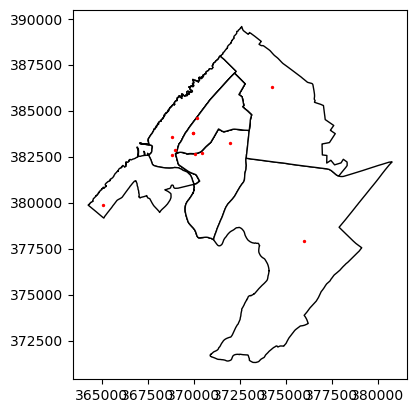

In [463]:
# Plot the intersection of health care facilities with the commune layer
base = comm_intersect_hlth.plot(color='white', edgecolor='black')
hlth_care_intersection.plot(ax=base, color='red', markersize=2)

**.buffer()**

*   Description: Creates a buffer around each geometry in a GeoDataFrame.
*   Parameters: None (Uses default buffer distance).
*   Return Value: GeoDataFrame with geometries buffered

<Axes: >

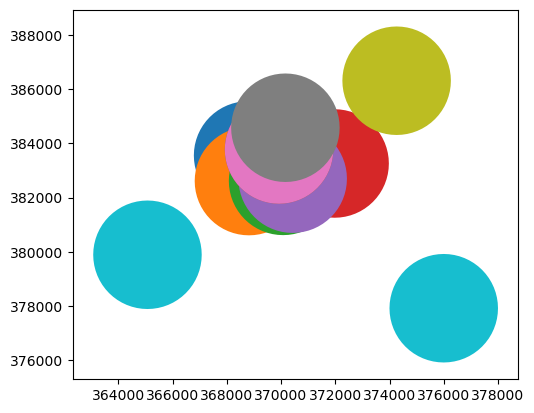

In [464]:
# Create a buffer around the intersection of health care facilities and the Rabat-Sale area,
# with a buffer distance of 2000 units

health_care_buff = hlth_care_intersection.buffer(2000)
health_care_buff.plot(cmap='tab10')

In [465]:
# Create a GeoDataFrame containing buffered points
hlth_care_gdf = geopandas.GeoDataFrame(geometry=health_care_buff)

<Axes: >

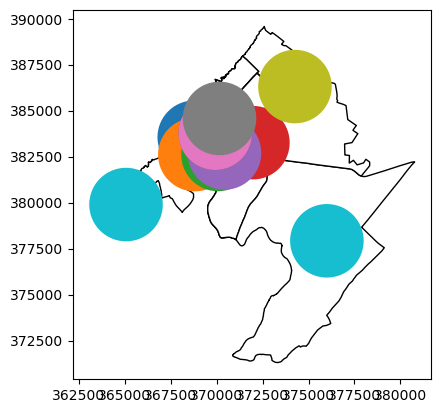

In [466]:
# Plot the health care facilities on top of the concatenated GeoDataFrame
base = comm_intersect_hlth.plot(color='white', edgecolor='black')
hlth_care_gdf.plot(ax=base, cmap='tab10', markersize=2)

In [467]:
# Dissolve the concatenated GeoDataFrame to merge all polygons communes into one
dissolved_comm = comm_intersect_hlth.dissolve()

**.dissolve()**

*   Description: Aggregates GeoDataFrame geometries based on a common attribute.
*   Parameters: None.
*   Return Value: GeoDataFrame with dissolved geometries.

<Axes: >

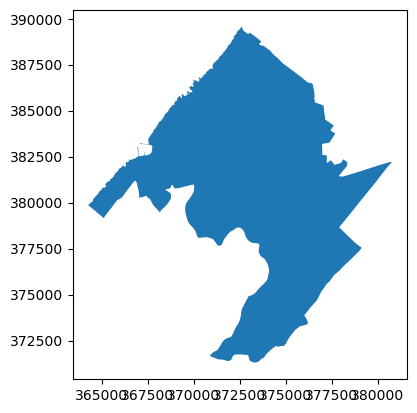

In [190]:
dissolved_comm.plot()

<Axes: >

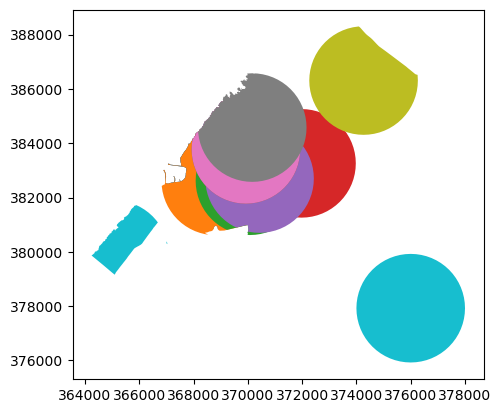

In [468]:
# Overlay the health care GeoDataFrame with the dissolved community GeoDataFrame
# to find the intersection, which represents the served area
served_area = hlth_care_gdf.overlay(dissolved_comm, how='intersection')
# Plot the served area
served_area.plot(cmap='tab10')

<Axes: >

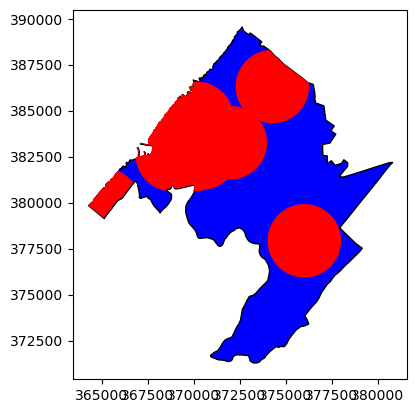

In [469]:
# Plotting the served area on top of the community GeoDataFrame to visualize
# the overlap, with different colors representing different categories,
# on a map with white background and black edges
base = dissolved_comm.plot(color='blue', edgecolor='black')
served_area.plot(ax=base, color='red', markersize=2)

<Axes: >

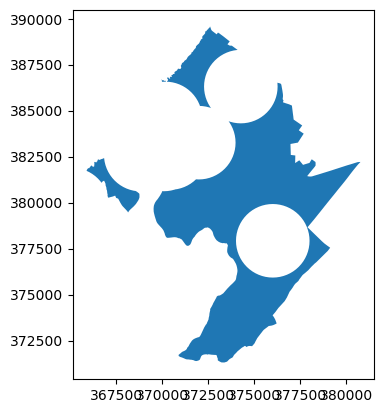

In [471]:
# Calculating the underserved area by taking the difference between the dissolved
# community GeoDataFrame and the served area, and then plotting it with different
# colors representing different categories on a map
underserved_area = dissolved_comm.overlay(served_area, how='difference')
underserved_area.plot(cmap='tab10')

In [473]:
# Assigning a new column 'Type' to identify the areas as either 'Served_area' or 'Underserved_area'
served_area['Type'] = 'Served_area'
underserved_area['Type'] = 'Underserved_area'

In [475]:
# Concatenating the served and underserved areas GeoDataFrames
concatenated_srv_unsrv = pd.concat([served_area, underserved_area], ignore_index=True)

<Axes: >

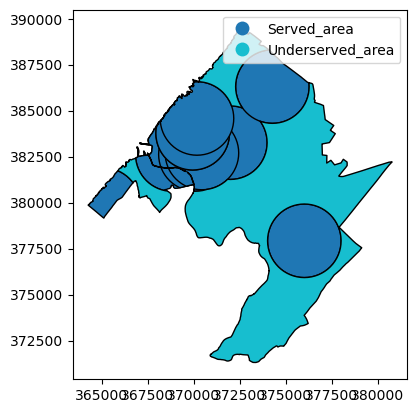

In [476]:
concatenated_srv_unsrv.plot(column='Type',edgecolor = 'k', legend= True)

**Imports the matplotlib library for plotting.**

*   Description: Plots the GeoDataFrame with different colors based on the 'Type' column.
*   Parameters:
*   column='Type': Specifies the column to use for coloring.
*   edgecolor='k': Specifies the edge color of the polygons.
*   legend=True: Enables the display of a legend
*   Return Value: Matplotlib axes object

**Adjusts the position of the legend within the plot.**

*   Parameters:
*   bbox_to_anchor((1,1)): Specifies the position of the legend.

**Sets the font size of legend labels.**

*   Parameters:6: Font size to set for legend labels.
*   Displays the plot.

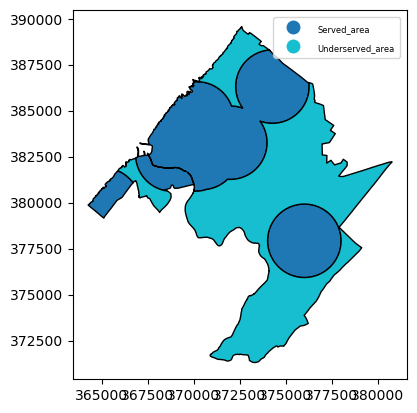

In [384]:
import matplotlib.pyplot as plt

# Plot the GeoDataFrame
ax = concatenated_srv_unsrv.plot(column='Type', edgecolor='k', legend=True)

# Adjust the position and size of the legend
legend = ax.get_legend()
legend.set_bbox_to_anchor((1,1))  # Move to upper left, # Set the title and font size

# Set font size for legend labels
for label in legend.get_texts():
    label.set_fontsize(6)  # Set the font size of legend labels

# Show the plot
plt.show()

# 	Visualization

- Overlay roads on the map to understand accessibility levels.
- Highlight the river with blue color to visualize geographic barriers.

<Axes: >

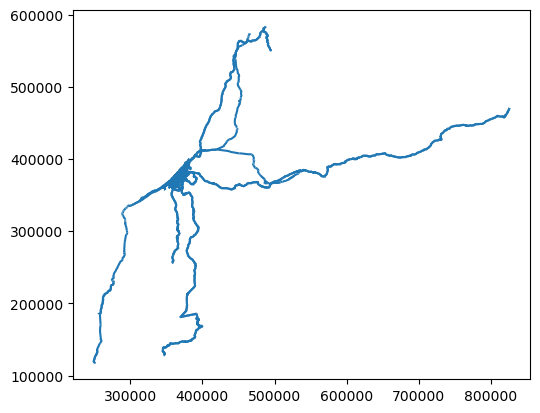

In [477]:
roads.plot()

In [98]:
roads

osm_id                                               name   type  \
0        1821827                        Fes - Marrakech فاس - مراكش  route   
1        1827532                     Route Nationale 6الطريق الوطني  route   
2        1828266  Autoroute Port Tanger Med - Rabat طرق السيارات...  route   
3        1828267                       Autoroute Casablanca – Rabat  route   
4        4486847                 L1: Madinat Al Irfane → Hay Karima  route   
5        4486848             L2: Hôpital Moulay Youssef → Hassan II  route   
6        4508771                               طنجة - الدار البيضاء  route   
7        5265275     Bus 12: Rue Melilia →Lotissement Sidi Abdellah  route   
8        5278778                             L32H:Harhoura-Bab Lhad  route   
9        5279026                             L32H:Bab Lhad-Harhoura  route   
10       5293754                 L1: Hay Karima → Madinat Al Irfane  route   
11       5391136             L2: Hassan II → Hôpital Moulay Youssef  route   
12       5402478     Bus 12: Lotissement Sidi Abdellah →Rue Melilia  route   
13       5403210  Bus 69: Lotissement Sidi Abdellah →Salé El Jadida  route   
14       5403211  Bus 69: Salé El Jadida →Lotissement Sidi Abdellah  route   
15       6109759                                               None  route   
16       6109789                                               None  route   
17       6149081                         L31:Bab Lhad-Mers El Kheir  route   
18       6153363                     Bus 1 : Sala al Jadida - Océan  route   
19       6153523                       Bus 2 : Kariat - Bab Chellah  route   
20       6153689                     Bus 3 : Marché de Gros - Océan  route   
21       6153803                     Bus 4 : Marché de Gros - Océan  route   
22       6582405                                               None  route   
23       6582409                                               None  route   
24       6582452                           الطريق الإقليمي رقم 4002  route   
25       6582454                                               None  route   
26       6582494                                               None  route   
27       6582496                                               None  route   
28       6582555                                               None  route   
29       6582579                                               None  route   
30       6582587                           الطريق الإقليمي رقم 4025  route   
31       6582597                                               None  route   
32       6582605                                               None  route   
33       6582606                                               None  route   
34       6582617                                               None  route   
35       6582983                                               None  route   
36       6583019                                               None  route   
37       6583080                                               None  route   
38       6583158                           الطريق الإقليمي رقم 4024  route   
39       6583170                                               None  route   
40       6583389                                               None  route   
41       6583394                                               None  route   
42       6583396                                               None  route   
43       6583402                                               None  route   
44       6583415                                               None  route   
45       6815851                Autoroute de Contournement de Rabat  route   
46       7351721                               L29:Douar jdid-Shoul  route   
47       7432228                         L31:Mers El Kheir-Bab Lhad  route   
48       8754423                                 Route Nationale 25  route   
49      12949544                          L101:Hay Ennahda-Hay Fath  route   
50      12951541                

In [479]:
# Dissolve based on a column named 'Type'
roads =roads.dissolve(by='highway', aggfunc='first')

In [480]:
roads

geometry    osm_id  \
highway                                                                       
primary         MULTILINESTRING ((365800.655 377346.740, 36580...   4004875   
primary_link    MULTILINESTRING ((367079.148 380272.586, 36706...   4060988   
secondary       MULTILINESTRING ((367767.855 375861.921, 36776...   4004874   
secondary_link  MULTILINESTRING ((371603.220 383803.108, 37164...  97698863   
tertiary        MULTILINESTRING ((365724.647 379376.101, 36573...   3997580   
tertiary_link   MULTILINESTRING ((365756.176 379293.551, 36575...   4006361   

                                                             name  type  \
highway                                                                   
primary                        Place Beni Znassen ساحة بني يزناسن  None   
primary_link         Place Othman Ibn Affane ساحة عثمان اِبن عفان  None   
secondary                 Avenue Ahmed Balafrej شارع أحمد بلافريج  None   
secondary_link  Avenue Sidi Mohammed Ben Abdellah شارع سيدي مح...  None   
tertiary                 Avenue Fal Ould Oumeir شارع فال ولد عمير  None   
tertiary_link                          Avenue Bouabid شارع بوعبيد  None   

                                                       other_tags waterway  \
highway                                                                      
primary         "int_name"=>"Sahat Beni Znassen","junction"=>"...     None   
primary_link    "destination:street"=>"Avenue Ibn Toumert","la...     None   
secondary       "lanes"=>"2","maxspeed"=>"60","name:ar"=>"شارع...     None   
secondary_link  "lanes"=>"1","oneway"=>"yes","surface"=>"asphalt"     None   
tertiary        "int_name"=>"Chari Fal Ould Oumeir","lanes"=>"...     None   
tertiary_link   "destination:street"=>"Rue Abderahmane Ghafiqi...     None   

               aerialway barrier man_made railway  z_order   layer  \
highway                                                              
primary             None    None     None    None      7.0  roadss   
primary_link        None    None     None    None      7.0  roadss   
secondary           None    None     None    None      6.0  roadss   
secondary_link      None    None     None    None      6.0  roadss   
tertiary            None    None     None    None      4.0  roadss   
tertiary_link       None    None     None    None      4.0  roadss   

                                                       path  
highway                                                      
primary         C:\Users\user\Downloads\school_t\roadss.shp  
primary_link    C:\Users\user\Downloads\school_t\roadss.shp  
secondary       C:\Users\user\Downloads\school_t\roadss.shp  
secondary_link  C:\Users\user\Downloads\school_t\roadss.shp  
tertiary        C:\Users\user\Downloads\school_t\roadss.shp  
tertiary_link   C:\Users\user\Downloads\school_t\roadss.shp

In [481]:
roads.reset_index(inplace=True)

<Axes: >

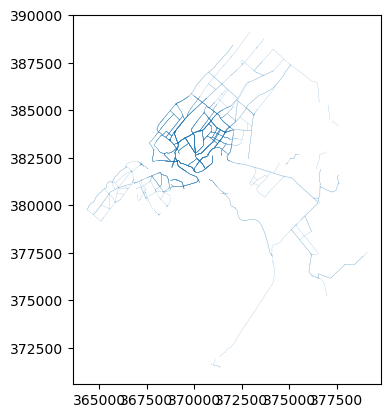

In [482]:
# Overlaying roads with concatenated served and underserved areas to find the intersection
roads_intersection = roads.overlay(concatenated_srv_unsrv, how='intersection')

# Plotting the resulting intersection
roads_intersection.plot(linewidth=0.1)

In [483]:
roads_intersection

highway    osm_id  \
0          primary   4004875   
1     primary_link   4060988   
2        secondary   4004874   
3   secondary_link  97698863   
4         tertiary   3997580   
5    tertiary_link   4006361   
6          primary   4004875   
7     primary_link   4060988   
8        secondary   4004874   
9   secondary_link  97698863   
10        tertiary   3997580   
11   tertiary_link   4006361   
12         primary   4004875   
13    primary_link   4060988   
14       secondary   4004874   
15  secondary_link  97698863   
16        tertiary   3997580   
17   tertiary_link   4006361   
18         primary   4004875   
19    primary_link   4060988   
20       secondary   4004874   
21  secondary_link  97698863   
22        tertiary   3997580   
23   tertiary_link   4006361   
24         primary   4004875   
25    primary_link   4060988   
26       secondary   4004874   
27  secondary_link  97698863   
28        tertiary   3997580   
29   tertiary_link   4006361   
30         primary   4004875   
31    primary_link   4060988   
32       secondary   4004874   
33  secondary_link  97698863   
34        tertiary   3997580   
35   tertiary_link   4006361   
36         primary   4004875   
37    primary_link   4060988   
38       secondary   4004874   
39  secondary_link  97698863   
40        tertiary   3997580   
41   tertiary_link   4006361   
42         primary   4004875   
43    primary_link   4060988   
44       secondary   4004874   
45  secondary_link  97698863   
46        tertiary   3997580   
47   tertiary_link   4006361   
48         primary   4004875   
49    primary_link   4060988   
50       secondary   4004874   
51  secondary_link  97698863   
52        tertiary   3997580   
53   tertiary_link   4006361   
54         primary   4004875   
55    primary_link   4060988   
56       secondary   4004874   
57        tertiary   3997580   
58   tertiary_link   4006361   
59         primary   4004875   
60    primary_link   4060988   
61       secondary   4004874   
62  secondary_link  97698863   
63        tertiary   3997580   
64         primary   4004875   
65    primary_link   4060988   
66       secondary   4004874   
67  secondary_link  97698863   
68        tertiary   3997580   
69   tertiary_link   4006361   
70       secondary   4004874   
71        tertiary   3997580   
72   tertiary_link   4006361   

                                                 name  type  \
0                  Place Beni Znassen ساحة بني يزناسن  None   
1        Place Othman Ibn Affane ساحة عثمان اِبن عفان  None   
2             Avenue Ahmed Balafrej شارع أحمد بلافريج  None   
3   Avenue Sidi Mohammed Ben Abdellah شارع سيدي مح...  None   
4            Avenue Fal Ould Oumeir شارع فال ولد عمير  None   
5                          Avenue Bouabid شارع بوعبيد  None   
6                  Place Beni Znassen ساحة بني يزناسن  None   
7        Place Othman Ibn Affane ساحة عثمان اِبن عفان  None   
8             Avenue Ahmed Balafrej شارع أحمد بلافريج  None   
9   Avenue Sidi Mohammed Ben Abdellah شارع سيدي مح...  None   
10           Avenue Fal Ould Oumeir شارع فال ولد عمير  None   
11                         Avenue Bouabid شارع بوعبيد  None   
12                 Place Beni Znassen ساحة بني يزناسن  None   
13       Place Othman Ibn Affane ساحة عثمان اِبن عفان  None   
14            Avenue Ahmed Balafrej شارع أحمد بلافريج  None   
15  Avenue Sidi Mohammed Ben Abdellah شارع سيدي مح...  None   
16           Avenue Fal Ould Oumeir شارع فال ولد عمير  None   
17                         Avenue Bouabid شارع بوعبيد  None   
18                 Place Beni Znassen ساحة بني يزناسن  None   
19       Place Othman Ibn Affane ساحة عثمان اِبن عفان  None   
20            Avenue Ahmed Balafrej شارع أحمد بلافريج  None   
21  Avenue Sidi Mohammed Ben Abdellah شارع سيدي مح...  None   
22           Avenue Fal Ould Oumeir شارع فال ولد عمير  None   
23                         Avenue Bouabid شارع بوعبيد  None   
24                 Place Beni Znassen ساحة بني يزناسن  None   
25  

In [485]:
# Assign the type 'Roads' to the roads_intersection_main GeoDataFrame
roads_intersection['Type2'] = 'Roads'

In [486]:
roads_intersection['Type2']

0     Roads
1     Roads
2     Roads
3     Roads
4     Roads
5     Roads
6     Roads
7     Roads
8     Roads
9     Roads
10    Roads
11    Roads
12    Roads
13    Roads
14    Roads
15    Roads
16    Roads
17    Roads
18    Roads
19    Roads
20    Roads
21    Roads
22    Roads
23    Roads
24    Roads
25    Roads
26    Roads
27    Roads
28    Roads
29    Roads
30    Roads
31    Roads
32    Roads
33    Roads
34    Roads
35    Roads
36    Roads
37    Roads
38    Roads
39    Roads
40    Roads
41    Roads
42    Roads
43    Roads
44    Roads
45    Roads
46    Roads
47    Roads
48    Roads
49    Roads
50    Roads
51    Roads
52    Roads
53    Roads
54    Roads
55    Roads
56    Roads
57    Roads
58    Roads
59    Roads
60    Roads
61    Roads
62    Roads
63    Roads
64    Roads
65    Roads
66    Roads
67    Roads
68    Roads
69    Roads
70    Roads
71    Roads
72    Roads
Name: Type2, dtype: object

In [487]:
roads_intersection.columns

Index(['highway', 'osm_id', 'name', 'type', 'other_tags', 'waterway',
       'aerialway', 'barrier', 'man_made', 'railway', 'z_order', 'layer',
       'path', 'OBJECTID', 'ID', 'NAME_1', 'POP', 'Shape_Leng_1',
       'Shape_Area_1', 'OBJECTID_1_left', 'NAME_2', 'pop_maroca_left',
       'pop_etrang_left', 'pop_total__left', 'menages_14_left',
       'class_pop_left', 'SRF_left', 'DENSITE_14_left', 'RuleID_left',
       'Shape_Leng_2', 'Shape_Area_2', 'menage_urb_left', 'pop_urb_left',
       'etrange_ur_left', 'marocain_u_left', 'menage_rur_left', 'pop_rur_left',
       'etranger_r_left', 'marocain_r_left', 'prcnt_urb_left', 'index_right',
       'establishment health care name', 'district', 'Creation Date', 'Adress',
       'OBJECTID_1_right', 'NAME', 'pop_maroca_right', 'pop_etrang_right',
       'pop_total__right', 'menages_14_right', 'class_pop_right', 'SRF_right',
       'DENSITE_14_right', 'RuleID_right', 'Shape_Leng', 'Shape_Area',
       'menage_urb_right', 'pop_urb_right', 'et

In [488]:
roads_intersection

highway    osm_id  \
0          primary   4004875   
1     primary_link   4060988   
2        secondary   4004874   
3   secondary_link  97698863   
4         tertiary   3997580   
5    tertiary_link   4006361   
6          primary   4004875   
7     primary_link   4060988   
8        secondary   4004874   
9   secondary_link  97698863   
10        tertiary   3997580   
11   tertiary_link   4006361   
12         primary   4004875   
13    primary_link   4060988   
14       secondary   4004874   
15  secondary_link  97698863   
16        tertiary   3997580   
17   tertiary_link   4006361   
18         primary   4004875   
19    primary_link   4060988   
20       secondary   4004874   
21  secondary_link  97698863   
22        tertiary   3997580   
23   tertiary_link   4006361   
24         primary   4004875   
25    primary_link   4060988   
26       secondary   4004874   
27  secondary_link  97698863   
28        tertiary   3997580   
29   tertiary_link   4006361   
30         primary   4004875   
31    primary_link   4060988   
32       secondary   4004874   
33  secondary_link  97698863   
34        tertiary   3997580   
35   tertiary_link   4006361   
36         primary   4004875   
37    primary_link   4060988   
38       secondary   4004874   
39  secondary_link  97698863   
40        tertiary   3997580   
41   tertiary_link   4006361   
42         primary   4004875   
43    primary_link   4060988   
44       secondary   4004874   
45  secondary_link  97698863   
46        tertiary   3997580   
47   tertiary_link   4006361   
48         primary   4004875   
49    primary_link   4060988   
50       secondary   4004874   
51  secondary_link  97698863   
52        tertiary   3997580   
53   tertiary_link   4006361   
54         primary   4004875   
55    primary_link   4060988   
56       secondary   4004874   
57        tertiary   3997580   
58   tertiary_link   4006361   
59         primary   4004875   
60    primary_link   4060988   
61       secondary   4004874   
62  secondary_link  97698863   
63        tertiary   3997580   
64         primary   4004875   
65    primary_link   4060988   
66       secondary   4004874   
67  secondary_link  97698863   
68        tertiary   3997580   
69   tertiary_link   4006361   
70       secondary   4004874   
71        tertiary   3997580   
72   tertiary_link   4006361   

                                                 name  type  \
0                  Place Beni Znassen ساحة بني يزناسن  None   
1        Place Othman Ibn Affane ساحة عثمان اِبن عفان  None   
2             Avenue Ahmed Balafrej شارع أحمد بلافريج  None   
3   Avenue Sidi Mohammed Ben Abdellah شارع سيدي مح...  None   
4            Avenue Fal Ould Oumeir شارع فال ولد عمير  None   
5                          Avenue Bouabid شارع بوعبيد  None   
6                  Place Beni Znassen ساحة بني يزناسن  None   
7        Place Othman Ibn Affane ساحة عثمان اِبن عفان  None   
8             Avenue Ahmed Balafrej شارع أحمد بلافريج  None   
9   Avenue Sidi Mohammed Ben Abdellah شارع سيدي مح...  None   
10           Avenue Fal Ould Oumeir شارع فال ولد عمير  None   
11                         Avenue Bouabid شارع بوعبيد  None   
12                 Place Beni Znassen ساحة بني يزناسن  None   
13       Place Othman Ibn Affane ساحة عثمان اِبن عفان  None   
14            Avenue Ahmed Balafrej شارع أحمد بلافريج  None   
15  Avenue Sidi Mohammed Ben Abdellah شارع سيدي مح...  None   
16           Avenue Fal Ould Oumeir شارع فال ولد عمير  None   
17                         Avenue Bouabid شارع بوعبيد  None   
18                 Place Beni Znassen ساحة بني يزناسن  None   
19       Place Othman Ibn Affane ساحة عثمان اِبن عفان  None   
20            Avenue Ahmed Balafrej شارع أحمد بلافريج  None   
21  Avenue Sidi Mohammed Ben Abdellah شارع سيدي مح...  None   
22           Avenue Fal Ould Oumeir شارع فال ولد عمير  None   
23                         Avenue Bouabid شارع بوعبيد  None   
24                 Place Beni Znassen ساحة بني يزناسن  None   
25  

In [489]:
roads = roads_intersection[['Type2','geometry']]

In [490]:
roads

Type2                                           geometry
0   Roads  MULTILINESTRING ((368735.309 380846.535, 36873...
1   Roads  MULTILINESTRING ((369072.387 382966.456, 36907...
2   Roads  MULTILINESTRING ((370824.411 382135.522, 37077...
3   Roads  MULTILINESTRING ((369099.314 382294.670, 36909...
4   Roads  MULTILINESTRING ((370208.961 381331.470, 37021...
5   Roads  MULTILINESTRING ((367181.216 382136.962, 36719...
6   Roads  MULTILINESTRING ((368083.325 381696.824, 36807...
7   Roads  MULTILINESTRING ((369072.387 382966.456, 36907...
8   Roads  MULTILINESTRING ((369090.193 382336.970, 36908...
9   Roads  MULTILINESTRING ((369099.314 382294.670, 36909...
10  Roads  MULTILINESTRING ((369085.961 382357.799, 36907...
11  Roads  MULTILINESTRING ((370038.602 382813.940, 37003...
12  Roads  MULTILINESTRING ((368507.449 380718.863, 36851...
13  Roads  MULTILINESTRING ((368500.920 380715.454, 36850...
14  Roads  MULTILINESTRING ((370743.015 382072.306, 37072...
15  Roads  MULTILINESTRING ((369099.314 382294.670, 36909...
16  Roads  MULTILINESTRING ((368385.453 380724.663, 36837...
17  Roads  MULTILINESTRING ((367181.216 382136.962, 36719...
18  Roads  MULTILINESTRING ((369097.339 383002.238, 36907...
19  Roads  MULTILINESTRING ((369072.387 382966.456, 36907...
20  Roads  MULTILINESTRING ((370950.553 382615.669, 37095...
21  Roads  MULTILINESTRING ((371603.220 383803.108, 37164...
22  Roads  MULTILINESTRING ((370208.961 381331.470, 37021...
23  Roads  MULTILINESTRING ((370857.286 383549.521, 37085...
24  Roads  MULTILINESTRING ((373137.783 384760.819, 37313...
25  Roads  MULTILINESTRING ((372880.296 385000.797, 37288...
26  Roads  MULTILINESTRING ((370950.553 382615.669, 37095...
27  Roads  MULTILINESTRING ((371603.220 383803.108, 37164...
28  Roads  MULTILINESTRING ((371336.136 384010.006, 37133...
29  Roads  MULTILINESTRING ((372029.222 383997.401, 37203...
30  Roads  MULTILINESTRING ((369097.339 383002.238, 36907...
31  Roads  MULTILINESTRING ((369072.387 382966.456, 36907...
32  Roads  MULTILINESTRING ((370950.553 382615.669, 37095...
33  Roads  MULTILINESTRING ((371603.220 383803.108, 37164...
34  Roads  MULTILINESTRING ((370208.961 381331.470, 37021...
35  Roads  MULTILINESTRING ((370857.286 383549.521, 37085...
36  Roads  MULTILINESTRING ((369097.339 383002.238, 36907...
37  Roads  MULTILINESTRING ((369072.387 382966.456, 36907...
38  Roads  MULTILINESTRING ((370950.553 382615.669, 37095...
39  Roads  MULTILINESTRING ((371603.220 383803.108, 37164...
40  Roads  MULTILINESTRING ((369085.961 382357.799, 36907...
41  Roads  MULTILINESTRING ((370857.286 383549.521, 37085...
42  Roads  MULTILINESTRING ((369097.339 383002.238, 36907...
43  Roads  MULTILINESTRING ((369072.387 382966.456, 36907...
44  Roads  MULTILINESTRING ((370950.553 382615.669, 37095...
45  Roads  MULTILINESTRING ((371603.220 383803.108, 37164...
46  Roads  MULTILINESTRING ((369085.961 382357.799, 36907...
47  Roads  MULTILINESTRING ((370857.286 383549.521, 37085...
48  Roads  MULTILINESTRING ((369097.339 383002.238, 36907...
49  Roads  MULTILINESTRING ((369072.387 382966.456, 36907...
50  Roads  MULTILINESTRING ((371079.401 383081.428, 37107...
51  Roads  MULTILINESTRING ((371603.220 383803.108, 37164...
52  Roads  MULTILINESTRING ((371091.691 386129.485, 37099...
53  Roads  MULTILINESTRING ((372029.222 383997.401, 37203...
54  Roads  MULTILINESTRING ((373137.783 384760.819, 37313...
55  Roads  LINESTRING (372880.296 385000.797, 372887.643 ...
56  Roads  MULTILINESTRING ((372706.269 385053.285, 37270...
57  Roads  MULTILINESTRING ((374223.021 386231.369, 37420...
58  Roads  MULTILINESTRING ((375056.106 387359.904, 37506...
59  Roads  MULTILINESTRING ((365891.158 380169.390, 36589...
60  Roads  MULTILINESTRING ((367038.412 380284.749, 36703...
61  Roads  MULTILINESTRING ((365535.391 379813.613, 36545...
62  Roads  MULTILINESTRING ((365530.723 380577.254, 36552...
63  Roads  MULTILINESTRING ((366514.942 380888.836, 36650...
64  Roads  MULTILINESTRING ((366797.426

In [491]:
roads= roads.rename(columns={'Type2':'Type'})

In [492]:
# Dissolve based on a column named 'Type'
roads =roads.dissolve(by='Type', aggfunc='first')

In [493]:
roads

geometry
Type                                                    
Roads  MULTILINESTRING ((368735.309 380846.535, 36873...

In [494]:
roads.reset_index(inplace=True)

<Axes: >

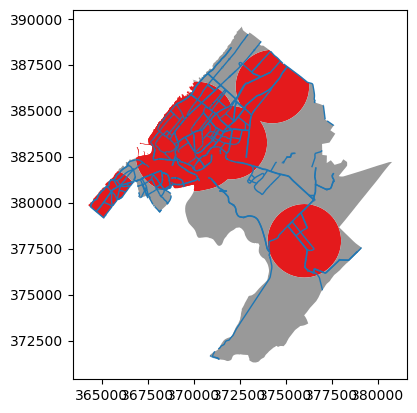

In [495]:
base = concatenated_srv_unsrv.plot(column='Type', cmap='Set1')

roads.plot(ax=base, linewidth=1)

In [496]:
river

osm_id           name highway waterway aerialway barrier man_made  \
0  125772869  واد ابو رقراق    None    river      None    None     None   
1  185209083  واد ابو رقراق    None    river      None    None     None   
2  208098909  واد ابو رقراق    None    river      None    None     None   
3  208288161  واد ابو رقراق    None    river      None    None     None   

  railway  z_order                                         other_tags  \
0    None        0  "admin_level"=>"5","border_type"=>"province","...   
1    None        0  "admin_level"=>"5","border_type"=>"province","...   
2    None        0  "admin_level"=>"5","border_type"=>"province","...   
3    None        0  "admin_level"=>"5","border_type"=>"province","...   

                                            geometry  
0  LINESTRING (370988.203 371681.167, 370953.504 ...  
1  LINESTRING (369936.866 380973.232, 369917.129 ...  
2  LINESTRING (373560.443 377512.676, 373564.767 ...  
3  LINESTRING (370807.004 378081.762, 370716.204 ...

In [497]:
river['Type']= 'River'

In [498]:
# Dissolve based on a column named 'Type'
river =river.dissolve(by='Type', aggfunc='first')

In [499]:
river.reset_index(inplace=True)

In [500]:
river = river[['Type', 'geometry']]

<Axes: >

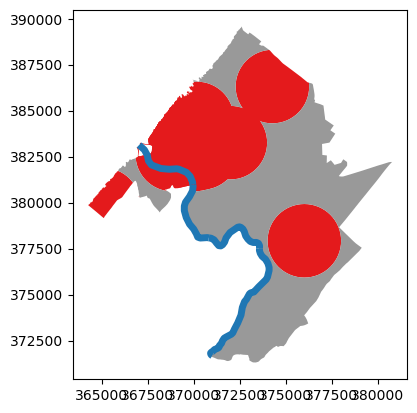

In [501]:
base = concatenated_srv_unsrv.plot(column='Type', cmap='Set1')

river.plot(ax=base, linewidth=5)

In [502]:
river_buf = river.buffer(200)

In [503]:
type(river_buf)

geopandas.geoseries.GeoSeries

In [504]:
river_buf = geopandas.GeoDataFrame(river_buf)

In [505]:
river_buf

0
0  POLYGON ((369722.317 381069.354, 369619.813 38...

In [506]:
river_buf = river_buf.rename(columns= {0: 'geometry'})

In [507]:
river_buf= river_buf.set_geometry('geometry')

In [508]:
river_buf

geometry
0  POLYGON ((369722.317 381069.354, 369619.813 38...

In [509]:
river_buf.explore()

In [510]:
river_buf['Type']= 'River'

In [511]:
river_buf

geometry   Type
0  POLYGON ((369722.317 381069.354, 369619.813 38...  River

In [512]:
roads

Type                                           geometry
0  Roads  MULTILINESTRING ((368735.309 380846.535, 36873...

In [513]:
# Concatenating the roads and river areas GeoDataFrames
concatenated_rds_river = pd.concat([roads, river_buf], ignore_index=True)

In [514]:
concatenated_rds_river

Type                                           geometry
0  Roads  MULTILINESTRING ((368735.309 380846.535, 36873...
1  River  POLYGON ((369722.317 381069.354, 369619.813 38...

In [515]:
comm_intersect_hlth

OBJECTID            ID        NAME_1       POP  Shape_Leng_1  \
4        633  1.504000e+13  Bab Lamrissa  140383.0      0.236634   
4        633  1.504000e+13  Bab Lamrissa  140383.0      0.236634   
4        633  1.504000e+13  Bab Lamrissa  140383.0      0.236634   
5        634  1.504000e+13       Bettana  103165.0      0.172995   
5        634  1.504000e+13       Bettana  103165.0      0.172995   
5        634  1.504000e+13       Bettana  103165.0      0.172995   
6        635  1.504000e+13       Hssaine  163672.0      0.425328   
7        636  1.504000e+13       Layayda  118233.0      0.273978   
8        637  1.504000e+13     Tabriquet  234733.0      0.137808   
8        637  1.504000e+13     Tabriquet  234733.0      0.137808   
8        637  1.504000e+13     Tabriquet  234733.0      0.137808   
22       616  1.504000e+13        Hassan  128425.0      0.199253   

    Shape_Area_1  OBJECTID_1_left NAME_2  pop_maroca_left  pop_etrang_left  \
4       0.000939               26   Sale         979816.0           2347.0   
4       0.000939               26   Sale         979816.0           2347.0   
4       0.000939               26   Sale         979816.0           2347.0   
5       0.001334               26   Sale         979816.0           2347.0   
5       0.001334               26   Sale         979816.0           2347.0   
5       0.001334               26   Sale         979816.0           2347.0   
6       0.005136               26   Sale         979816.0           2347.0   
7       0.002541               26   Sale         979816.0           2347.0   
8       0.000766               26   Sale         979816.0           2347.0   
8       0.000766               26   Sale         979816.0           2347.0   
8       0.000766               26   Sale         979816.0           2347.0   
22      0.000828               25  Rabat         564936.0          12891.0   

    ...  Shape_Area  menage_urb_right  pop_urb_right  etrange_ur_right  \
4   ...    0.069895          218432.0       915658.0            2325.0   
4   ...    0.069895          218432.0       915658.0            2325.0   
4   ...    0.069895          218432.0       915658.0            2325.0   
5   ...    0.069895          218432.0       915658.0            2325.0   
5   ...    0.069895          218432.0       915658.0            2325.0   
5   ...    0.069895          218432.0       915658.0            2325.0   
6   ...    0.069895          218432.0       915658.0            2325.0   
7   ...    0.069895          218432.0       915658.0            2325.0   
8   ...    0.069895          218432.0       915658.0            2325.0   
8   ...    0.069895          218432.0       915658.0            2325.0   
8   ...    0.069895          218432.0       915658.0            2325.0   
22  ...    0.011264          151670.0       577827.0           12891.0   

    marocain_u_right  menage_rur_right  pop_rur_right  etranger_r_right  \
4           913333.0           12908.0        66505.0              22.0   
4           913333.0           12908.0        66505.0              22.0   
4           913333.0           12908.0        66505.0              22.0   
5           913333.0           12908.0        66505.0              22.0   
5           913333.0           12908.0        66505.0              22.0   
5           913333.0           12908.0        66505.0              22.0   
6           913333.0           12908.0        66505.0              22.0   
7           913333.0           12908.0        66505.0              22.0   
8           913333.0           12908.0        66505.0              22.0   
8           913333.0           12908.0        66505.0              22.0   
8           913333.0           12908.0        66505.0              22.0   
22          564936.0               0.0            0.0               0.0   

    marocain_r_right  prcnt_urb_right  
4            66483.0        93.228721  
4            66483.0        93.228721  
4            66483.0        93.228721  
5    

In [516]:
comm_intersect_hlth['Type']= 'Boundary'

In [517]:
comm_intersect_hlth.columns

Index(['OBJECTID', 'ID', 'NAME_1', 'POP', 'Shape_Leng_1', 'Shape_Area_1',
       'OBJECTID_1_left', 'NAME_2', 'pop_maroca_left', 'pop_etrang_left',
       'pop_total__left', 'menages_14_left', 'class_pop_left', 'SRF_left',
       'DENSITE_14_left', 'RuleID_left', 'Shape_Leng_2', 'Shape_Area_2',
       'menage_urb_left', 'pop_urb_left', 'etrange_ur_left', 'marocain_u_left',
       'menage_rur_left', 'pop_rur_left', 'etranger_r_left', 'marocain_r_left',
       'prcnt_urb_left', 'geometry', 'index_right',
       'establishment health care name', 'district', 'Creation Date', 'Adress',
       'OBJECTID_1_right', 'NAME', 'pop_maroca_right', 'pop_etrang_right',
       'pop_total__right', 'menages_14_right', 'class_pop_right', 'SRF_right',
       'DENSITE_14_right', 'RuleID_right', 'Shape_Leng', 'Shape_Area',
       'menage_urb_right', 'pop_urb_right', 'etrange_ur_right',
       'marocain_u_right', 'menage_rur_right', 'pop_rur_right',
       'etranger_r_right', 'marocain_r_right', 'prcnt_urb_r

In [518]:
comm_intersect_hlth = comm_intersect_hlth[[ 'NAME_1', 'POP','Type', 'geometry']]

In [519]:
comm_intersect_hlth

NAME_1       POP      Type  \
4   Bab Lamrissa  140383.0  Boundary   
4   Bab Lamrissa  140383.0  Boundary   
4   Bab Lamrissa  140383.0  Boundary   
5        Bettana  103165.0  Boundary   
5        Bettana  103165.0  Boundary   
5        Bettana  103165.0  Boundary   
6        Hssaine  163672.0  Boundary   
7        Layayda  118233.0  Boundary   
8      Tabriquet  234733.0  Boundary   
8      Tabriquet  234733.0  Boundary   
8      Tabriquet  234733.0  Boundary   
22        Hassan  128425.0  Boundary   

                                             geometry  
4   POLYGON ((369924.517 381190.831, 369895.703 38...  
4   POLYGON ((369924.517 381190.831, 369895.703 38...  
4   POLYGON ((369924.517 381190.831, 369895.703 38...  
5   POLYGON ((370904.030 378063.685, 370889.939 37...  
5   POLYGON ((370904.030 378063.685, 370889.939 37...  
5   POLYGON ((370904.030 378063.685, 370889.939 37...  
6   POLYGON ((374491.185 372205.675, 374486.027 37...  
7   POLYGON ((377870.942 381442.200, 377865.054 38...  
8   POLYGON ((369829.786 382668.980, 369793.331 38...  
8   POLYGON ((369829.786 382668.980, 369793.331 38...  
8   POLYGON ((369829.786 382668.980, 369793.331 38...  
22  POLYGON ((365092.877 379160.872, 365088.935 37...

In [520]:
# Reset the index of the GeoDataFrame
comm_intersect_hlth.reset_index(drop=True, inplace=True)

In [521]:
comm_intersect_hlth= comm_intersect_hlth.rename(columns={'NAME_1':'NAME'})

In [522]:
# Dissolve based on a column named 'Type'
comm_intersect_hlth = comm_intersect_hlth.dissolve(by='NAME', aggfunc='first')

In [523]:
comm_intersect_hlth

geometry       POP  \
NAME                                                                        
Bab Lamrissa  POLYGON ((369895.703 381294.002, 369859.773 38...  140383.0   
Bettana       POLYGON ((370889.939 378064.137, 370875.629 37...  103165.0   
Hassan        POLYGON ((365092.877 379160.872, 365088.935 37...  128425.0   
Hssaine       POLYGON ((374491.185 372205.675, 374486.027 37...  163672.0   
Layayda       POLYGON ((377870.942 381442.200, 377865.054 38...  118233.0   
Tabriquet     POLYGON ((369793.331 382667.376, 369748.001 38...  234733.0   

                  Type  
NAME                    
Bab Lamrissa  Boundary  
Bettana       Boundary  
Hassan        Boundary  
Hssaine       Boundary  
Layayda       Boundary  
Tabriquet     Boundary

In [524]:
# Reset the index of the GeoDataFrame
comm_intersect_hlth.reset_index(inplace=True)

In [525]:
comm_intersect_hlth

NAME                                           geometry       POP  \
0  Bab Lamrissa  POLYGON ((369895.703 381294.002, 369859.773 38...  140383.0   
1       Bettana  POLYGON ((370889.939 378064.137, 370875.629 37...  103165.0   
2        Hassan  POLYGON ((365092.877 379160.872, 365088.935 37...  128425.0   
3       Hssaine  POLYGON ((374491.185 372205.675, 374486.027 37...  163672.0   
4       Layayda  POLYGON ((377870.942 381442.200, 377865.054 38...  118233.0   
5     Tabriquet  POLYGON ((369793.331 382667.376, 369748.001 38...  234733.0   

       Type  
0  Boundary  
1  Boundary  
2  Boundary  
3  Boundary  
4  Boundary  
5  Boundary

<Axes: >

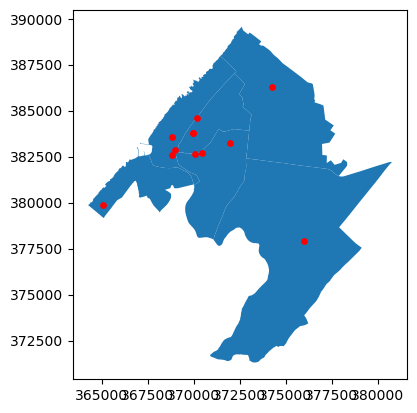

In [526]:
base = comm_intersect_hlth.plot()
hlth_care_intersection.plot(ax=base, color='red', markersize=15)

In [527]:
boundary = dissolved_comm.boundary

In [528]:
boundary

0    MULTILINESTRING ((370860.793 378067.346, 37082...
dtype: geometry

In [529]:
boundary = geopandas.GeoDataFrame(boundary)

In [530]:
boundary

0
0  MULTILINESTRING ((370860.793 378067.346, 37082...

In [531]:
boundary = boundary.rename(columns={0: 'geometry'})

In [532]:
boundary

geometry
0  MULTILINESTRING ((370860.793 378067.346, 37082...

In [533]:
boundary= boundary.set_geometry('geometry')

In [534]:
boundary

geometry
0  MULTILINESTRING ((370860.793 378067.346, 37082...

In [535]:
boundary['Type']= 'Boundary'

In [246]:
boundary

geometry      Type
0  MULTILINESTRING ((370860.793 378067.346, 37082...  Boundary

In [536]:
boundary.explore()

In [537]:
# Concatenating the boundary and concatenated_roads_river GeoDataFrames
concatenated_bou_rds_riv = pd.concat([boundary, concatenated_rds_river], ignore_index=True)

In [538]:
concatenated_bou_rds_riv

geometry      Type
0  MULTILINESTRING ((370860.793 378067.346, 37082...  Boundary
1  MULTILINESTRING ((368735.309 380846.535, 36873...     Roads
2  POLYGON ((369722.317 381069.354, 369619.813 38...     River

In [539]:
concatenated_srv_unsrv

OBJECTID            ID        NAME_1       POP  Shape_Leng_1  \
0        633  1.504000e+13  Bab Lamrissa  140383.0      0.236634   
1        633  1.504000e+13  Bab Lamrissa  140383.0      0.236634   
2        633  1.504000e+13  Bab Lamrissa  140383.0      0.236634   
3        633  1.504000e+13  Bab Lamrissa  140383.0      0.236634   
4        633  1.504000e+13  Bab Lamrissa  140383.0      0.236634   
5        633  1.504000e+13  Bab Lamrissa  140383.0      0.236634   
6        633  1.504000e+13  Bab Lamrissa  140383.0      0.236634   
7        633  1.504000e+13  Bab Lamrissa  140383.0      0.236634   
8        633  1.504000e+13  Bab Lamrissa  140383.0      0.236634   
9        633  1.504000e+13  Bab Lamrissa  140383.0      0.236634   
10       633  1.504000e+13  Bab Lamrissa  140383.0      0.236634   
11       633  1.504000e+13  Bab Lamrissa  140383.0      0.236634   
12       633  1.504000e+13  Bab Lamrissa  140383.0      0.236634   

    Shape_Area_1  OBJECTID_1_left NAME_2  pop_maroca_left  pop_etrang_left  \
0       0.000939               26   Sale         979816.0           2347.0   
1       0.000939               26   Sale         979816.0           2347.0   
2       0.000939               26   Sale         979816.0           2347.0   
3       0.000939               26   Sale         979816.0           2347.0   
4       0.000939               26   Sale         979816.0           2347.0   
5       0.000939               26   Sale         979816.0           2347.0   
6       0.000939               26   Sale         979816.0           2347.0   
7       0.000939               26   Sale         979816.0           2347.0   
8       0.000939               26   Sale         979816.0           2347.0   
9       0.000939               26   Sale         979816.0           2347.0   
10      0.000939               26   Sale         979816.0           2347.0   
11      0.000939               26   Sale         979816.0           2347.0   
12      0.000939               26   Sale         979816.0           2347.0   

    ...  pop_urb_right  etrange_ur_right  marocain_u_right  menage_rur_right  \
0   ...       915658.0            2325.0          913333.0           12908.0   
1   ...       915658.0            2325.0          913333.0           12908.0   
2   ...       915658.0            2325.0          913333.0           12908.0   
3   ...       915658.0            2325.0          913333.0           12908.0   
4   ...       915658.0            2325.0          913333.0           12908.0   
5   ...       915658.0            2325.0          913333.0           12908.0   
6   ...       915658.0            2325.0          913333.0           12908.0   
7   ...       915658.0            2325.0          913333.0           12908.0   
8   ...       915658.0            2325.0          913333.0           12908.0   
9   ...       915658.0            2325.0          913333.0           12908.0   
10  ...       915658.0            2325.0          913333.0           12908.0   
11  ...       915658.0            2325.0          913333.0           12908.0   
12  ...       915658.0            2325.0          913333.0           12908.0   

    pop_rur_right  etranger_r_right  marocain_r_right  prcnt_urb_right  \
0         66505.0              22.0           66483.0        93.228721   
1         66505.0              22.0           66483.0        93.228721   
2         66505.0              22.0           66483.0        93.228721   
3         66505.0              22.0           66483.0        93.228721   
4         66505.0              22.0           66483.0        93.228721   
5         66505.0              22.0           66483.0        93.228721   
6         66505.0              22.0           66483.0        93.228721   
7         66505.0              22.0           66483.0        93.228721   
8         66505.0              22.0           66483.0        93.228721   
9         66505.0              22.0           66483.0        93.228721   
10        66505.0      

In [540]:
# Dissolve based on a column named 'Type'
concatenated_srv_unsrv = concatenated_srv_unsrv.dissolve(by='Type', aggfunc='first')

In [541]:
concatenated_srv_unsrv

geometry  OBJECTID  \
Type                                                                            
Served_area       MULTIPOLYGON (((367014.779 380308.152, 367007....       633   
Underserved_area  MULTIPOLYGON (((370457.772 378098.207, 370418....       633   

                            ID        NAME_1       POP  Shape_Leng_1  \
Type                                                                   
Served_area       1.504000e+13  Bab Lamrissa  140383.0      0.236634   
Underserved_area  1.504000e+13  Bab Lamrissa  140383.0      0.236634   

                  Shape_Area_1  OBJECTID_1_left NAME_2  pop_maroca_left  ...  \
Type                                                                     ...   
Served_area           0.000939               26   Sale         979816.0  ...   
Underserved_area      0.000939               26   Sale         979816.0  ...   

                  Shape_Area  menage_urb_right  pop_urb_right  \
Type                                                            
Served_area         0.069895          218432.0       915658.0   
Underserved_area    0.069895          218432.0       915658.0   

                  etrange_ur_right  marocain_u_right  menage_rur_right  \
Type                                                                     
Served_area                 2325.0          913333.0           12908.0   
Underserved_area            2325.0          913333.0           12908.0   

                  pop_rur_right  etranger_r_right  marocain_r_right  \
Type                                                                  
Served_area             66505.0              22.0           66483.0   
Underserved_area        66505.0              22.0           66483.0   

                  prcnt_urb_right  
Type                               
Served_area             93.228721  
Underserved_area        93.228721  

[2 rows x 54 columns]

In [252]:
concatenated_srv_unsrv.reset_index(inplace=True)

In [253]:
concatenated_srv_unsrv

Type                                           geometry  \
0       Served_area  MULTIPOLYGON (((367014.779 380308.152, 367007....   
1  Underserved_area  MULTIPOLYGON (((370457.772 378098.207, 370418....   

   OBJECTID            ID        NAME_1       POP  Shape_Leng_1  Shape_Area_1  \
0       633  1.504000e+13  Bab Lamrissa  140383.0      0.236634      0.000939   
1       633  1.504000e+13  Bab Lamrissa  140383.0      0.236634      0.000939   

   OBJECTID_1_left NAME_2  ...  Shape_Area  menage_urb_right  pop_urb_right  \
0               26   Sale  ...    0.069895          218432.0       915658.0   
1               26   Sale  ...    0.069895          218432.0       915658.0   

   etrange_ur_right  marocain_u_right  menage_rur_right  pop_rur_right  \
0            2325.0          913333.0           12908.0        66505.0   
1            2325.0          913333.0           12908.0        66505.0   

   etranger_r_right  marocain_r_right  prcnt_urb_right  
0              22.0           66483.0        93.228721  
1              22.0           66483.0        93.228721  

[2 rows x 56 columns]

In [254]:
concatenated_srv_unsrv = concatenated_srv_unsrv[['Type', 'geometry', ]]

In [255]:
concatenated_srv_unsrv

Type                                           geometry
0       Served_area  MULTIPOLYGON (((367014.779 380308.152, 367007....
1  Underserved_area  MULTIPOLYGON (((370457.772 378098.207, 370418....

In [256]:
# Concatenating tall the data in one geodataframe
concat_rds__riv_boun_srv_unsrv = pd.concat([concatenated_bou_rds_riv, concatenated_srv_unsrv], ignore_index=True)

In [257]:
concat_rds__riv_boun_srv_unsrv

geometry              Type
0  MULTILINESTRING ((370860.793 378067.346, 37082...          Boundary
1  MULTILINESTRING ((368735.309 380846.535, 36873...             Roads
2  POLYGON ((369722.317 381069.354, 369619.813 38...             River
3  MULTIPOLYGON (((367014.779 380308.152, 367007....       Served_area
4  MULTIPOLYGON (((370457.772 378098.207, 370418....  Underserved_area

In [328]:
concat_rds__riv_boun_srv_unsrv.explore(column='Type')

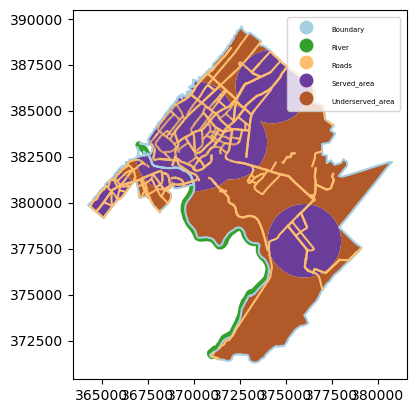

In [329]:
import matplotlib.pyplot as plt

# Plot the GeoDataFrame
ax = concat_rds__riv_boun_srv_unsrv.plot(column='Type', legend=True, cmap = 'Paired')

# Adjust the position and size of the legend
legend = ax.get_legend()
legend.set_bbox_to_anchor((1, 1))  # Move to upper left
 # Set the title and font size

# Set font size for legend labels
for label in legend.get_texts():
    label.set_fontsize(5)  # Set the font size of legend labels

# Show the plot
plt.show()

In [330]:
concat_rds__riv_boun_srv_unsrv.explore(column='Type', legend=True, cmap = 'Paired')

In [331]:
concatenated_srv_unsrv2 = concatenated_srv_unsrv

In [388]:
concatenated_srv_unsrv2['area'] = concatenated_srv_unsrv2.geometry.area

C:\Users\mahhi\anaconda3\Lib\site-packages\geopandas\geodataframe.py:1525: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


In [389]:
concatenated_srv_unsrv2

Type                                           geometry  \
0       Served_area  MULTIPOLYGON (((367014.779 380308.152, 367007....   
1  Underserved_area  MULTIPOLYGON (((370457.772 378098.207, 370418....   

           area  
0  5.453673e+07  
1  6.366954e+07

In [390]:
total_area = area.sum()

In [392]:
area_proportions = total_area / area

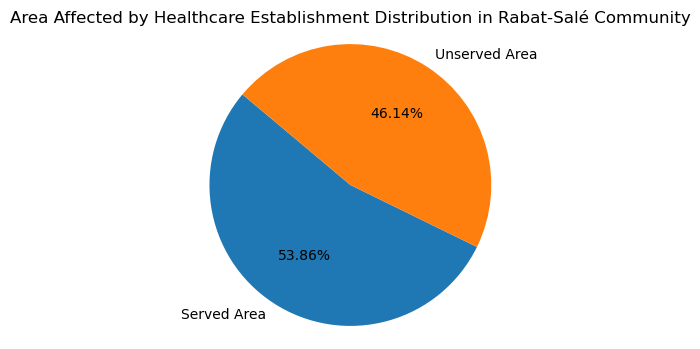

In [393]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming `area_proportions` is a Pandas Series with the proportions and `labels` is a list of custom labels
labels = ['Served Area', 'Unserved Area']  # Custom labels for the pie chart

# Plot the pie chart with custom labels
area_proportions.plot(kind='pie', labels=labels, figsize=(4, 4), autopct='%1.2f%%', startangle=140)
plt.title('Area Affected by Healthcare Establishment Distribution in Rabat-Salé Community')
plt.ylabel('')  # Remove the y-axis label
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()
